# **ReadMe:**
1. Download the 2 csv files
2. Create a folder called ECSE551 on google drive
3. Upload the csv files in the folder
4. Go to the Runtime tab and click Run all

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sys
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Data Analysis**

dataset:


*   Chronic Kidney Disease (CKD) data
*   Battery Dataset data



#Loading the data

In [3]:
# built in runtime of cells
!pip install ipython-autotime
%load_ext autotime

# load Chronic Kidney Disease data
ckd_data = pd.read_csv('/content/gdrive/MyDrive/ECSE551/CKD.csv')
ckd_data_df = ckd_data.iloc[:,:29]
#print(ckd_data_df.head(2))
ckd_class_df = ckd_data['label']
#print(ckd_class_df.head(2))

# load battery dataset data
battery_data = pd.read_csv('/content/gdrive/MyDrive/ECSE551/Battery_Dataset.csv')
battery_data_df = battery_data.iloc[:,:33]
#print(battery_data_df.head(2))
battery_class_df = battery_data['label']
#print(battery_class_df.head(2))

# observe the overall data stats
print(ckd_data_df.describe())
# observe the counts of each class
print(ckd_class_df.value_counts())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00
               ID   feature_1   feature_2   feature_3   feature_4   feature_5  \
count  330.000000  330.000000  330.000000  330.000000  330.000000  330.000000   
mean   165.500000    0.524843    0.477402    0.510724    0.521312    0.493970   
std     95.407023    0.193864    0.148982    0.289416    0.294794    0.292473   
min      1.000000    0.200100    0.200200    0.002000    0.001000    0.001000   
25%     83.250000    0.368275    0.366400    0.269250    0.281000    0.225250   
50%    165.500000    0.504000    0.472950    0.509000    0.535000    0.505500   
75%    247.750000    0.695500    0.567400    0.758500    0.770000    0.748250   
max    330.000000    0.889800    0.796300    0.999000    1.000000    0.995000   

        feature_6   feature_7   feature_8   feature_9  ...  feature_19  \
count  330.000000  330.000000  330.000000  330.000000  ...  330.000000   
mean     0.519409    0.512361    0.471324    

In [4]:
standardized_ckd_data = ckd_data_df.iloc[:,1:29]
mean = standardized_ckd_data.mean()
std = standardized_ckd_data.std()
standardized_ckd_data = (standardized_ckd_data - mean) / std
standardized_ckd_data = standardized_ckd_data.to_numpy()
print(type(standardized_ckd_data))
print(standardized_ckd_data.shape)
print(standardized_ckd_data)

<class 'numpy.ndarray'>
(330, 28)
[[-1.65241216  1.92773542  0.1322516  ...  1.62180466 -0.57523247
  -0.28824091]
 [-0.21996377 -0.83300077 -0.82139225 ...  0.84119068 -2.12357992
   0.33920589]
 [-0.33344546  2.06533594 -0.52078712 ... -0.82380702  0.29804386
  -0.44423179]
 ...
 [-1.40120497  1.17395309  0.12534113 ...  1.50663611 -0.66354475
  -0.0628871 ]
 [-0.51553199 -0.16513486 -1.40532634 ... -0.85275182  1.05703971
  -0.10948244]
 [ 0.07921522 -0.74507069  0.91658911 ...  1.07376683  0.09244104
  -0.10302068]]
time: 3.81 ms (started: 2025-02-16 04:26:21 +00:00)


In [5]:
standardized_battery_data = battery_data_df.iloc[:,1:33]
mean = standardized_battery_data.mean()
std = standardized_battery_data.std()
standardized_battery_data = (standardized_battery_data - mean) / std
standardized_battery_data = standardized_battery_data.to_numpy()
print(type(standardized_battery_data))
print(standardized_battery_data.shape)
print(standardized_battery_data)

<class 'numpy.ndarray'>
(732, 32)
[[-0.0915392   0.87138693 -1.03929784 ... -1.00575071 -0.05001007
   0.29588568]
 [ 0.17259858 -0.60242363  1.62444657 ... -1.40468091 -0.43463486
  -0.42957165]
 [-0.3575503  -1.15228939  1.24357067 ... -1.26358658 -0.3074873
   0.25826578]
 ...
 [ 0.00399999 -1.87915841 -0.52987206 ...  1.16550182  0.59417101
  -0.25591811]
 [-0.57860178  0.08734161 -1.49791742 ... -1.59280391  0.40450954
  -1.82649438]
 [-1.84995998 -1.38464417 -0.62636972 ... -0.68950652  1.15244501
  -1.18155098]]
time: 3.63 ms (started: 2025-02-16 04:26:21 +00:00)


#Chronic Kidney Disease (CKD) Data Features Distribution Visualization

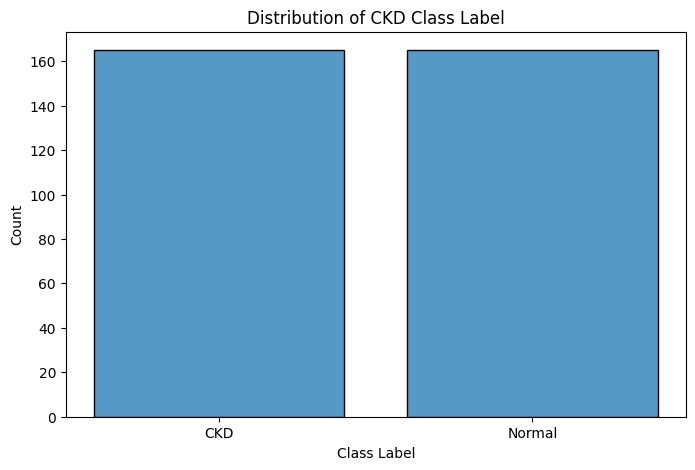

time: 196 ms (started: 2025-02-16 04:26:21 +00:00)


In [6]:
# Plot of class distribution
plt.figure(figsize=(8,5))
sns.histplot(ckd_class_df, kde = False, bins = 2, shrink=0.8)
plt.xticks(np.arange(0,2,step=1))
plt.title("Distribution of CKD Class Label")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

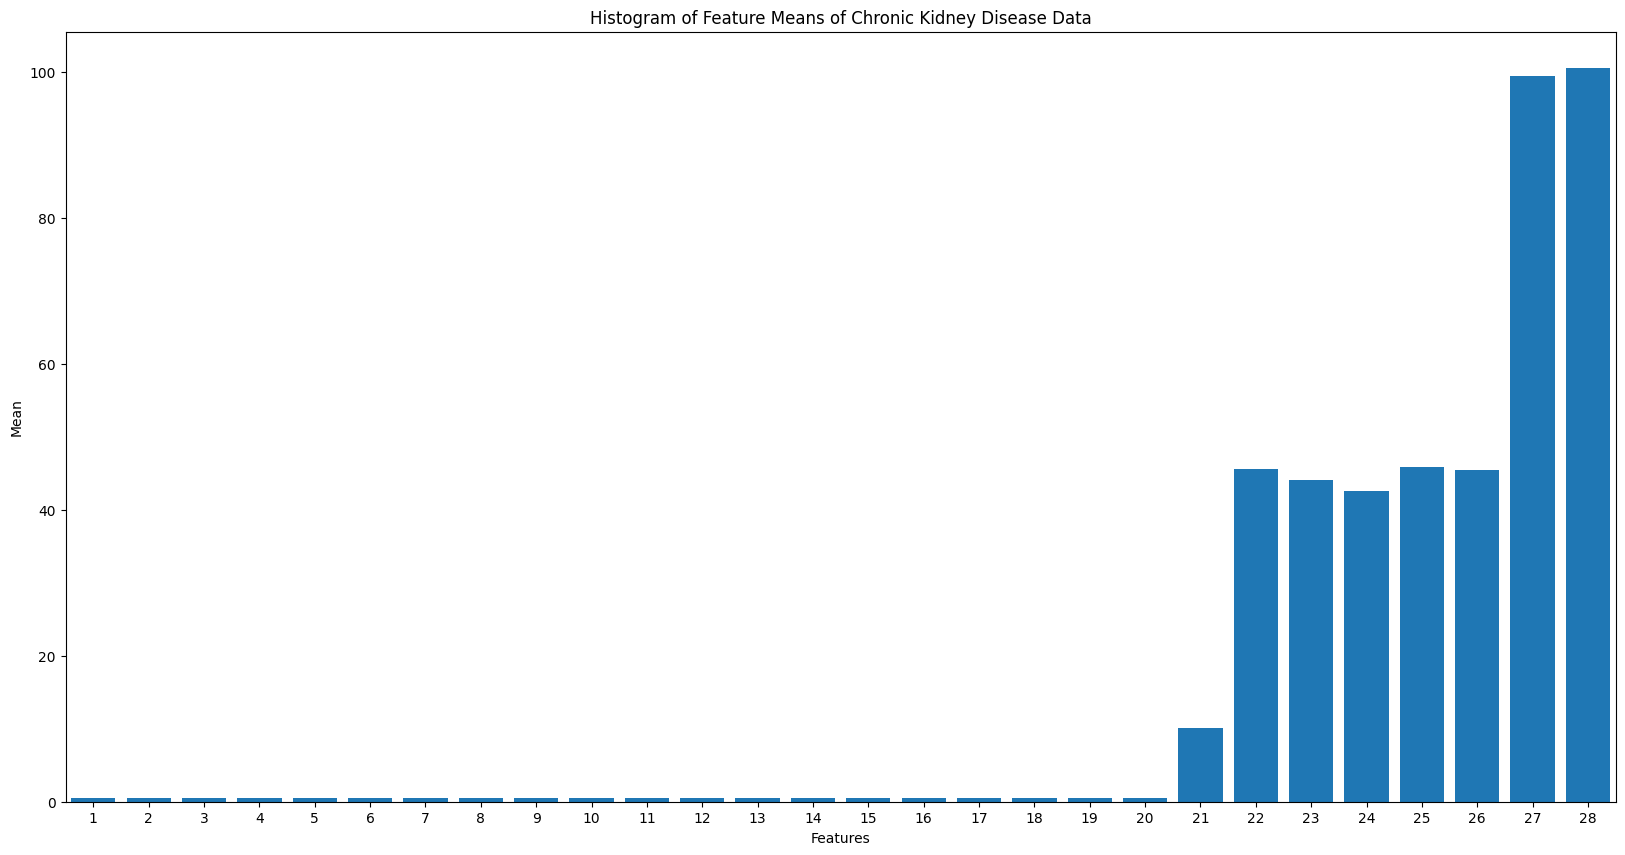

time: 331 ms (started: 2025-02-16 04:26:21 +00:00)


In [7]:
# Plot mean value of raw datas
plt.figure(figsize=(20,10))
#print(ckd_data_df.iloc[:,1:29].mean())

# Calculate mean values of the features
means = ckd_data_df.iloc[:,1:29].mean()
x_ticks = range(1, len(means)+1)
plt.bar(x_ticks, means.values)

plt.title("Histogram of Feature Means of Chronic Kidney Disease Data")
plt.xlabel("Features")
plt.ylabel("Mean")
plt.xticks(x_ticks)

# Adjust x-axis limits to remove extra blank space
plt.xlim(0.5, len(means) + 0.5)
plt.show()

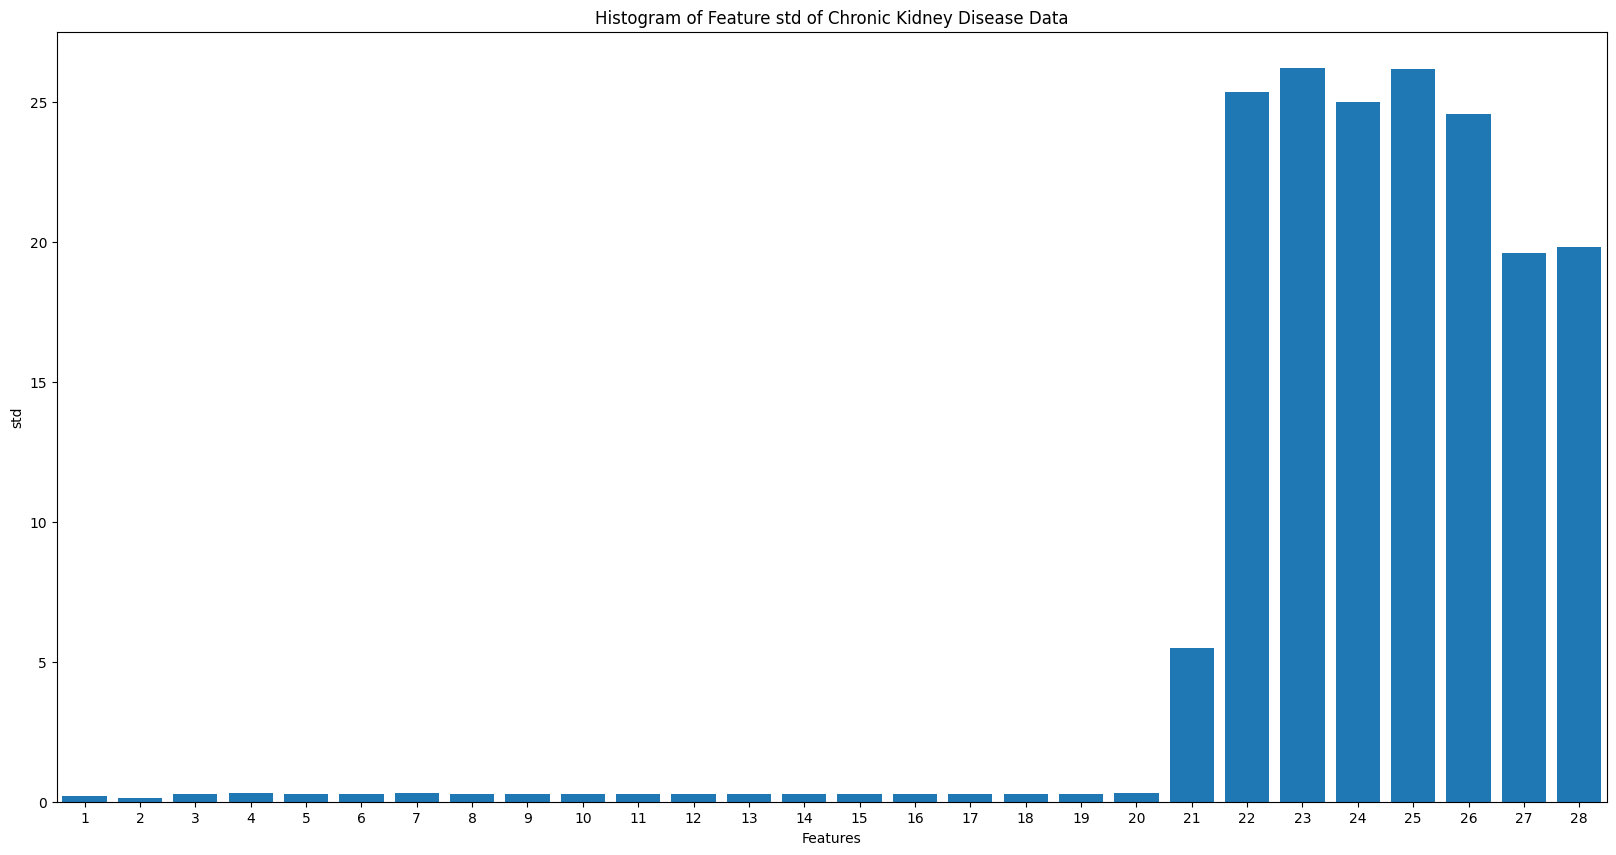

time: 353 ms (started: 2025-02-16 04:26:21 +00:00)


In [8]:
# Plot standard deviation value of raw datas
plt.figure(figsize=(20, 10))
#print(ckd_data_df.iloc[:,1:29].std())
std = ckd_data_df.iloc[:,1:29].std()
x_ticks = range(1, len(std)+1)
plt.bar(x_ticks, std.values)

plt.title("Histogram of Feature std of Chronic Kidney Disease Data")
plt.xlabel("Features")
plt.ylabel("std")
plt.xticks(x_ticks)

# Adjust x-axis limits to remove extra blank space
plt.xlim(0.5, len(std) + 0.5)
plt.show()


[ 2.40884753e-16 -4.62929358e-16 -3.51234193e-16 -6.45947942e-17
  8.88178420e-17 -6.99776937e-17 -2.96059473e-17 -1.07657990e-17
 -6.59405190e-17 -1.84364308e-16  1.33226763e-16 -8.07434927e-17
  9.42007415e-17  1.83018583e-16  4.30631961e-17 -2.74527875e-16
  1.74944234e-16 -2.28773229e-17  2.09933081e-16  2.47613378e-16
 -1.31881038e-16  1.29189588e-16 -4.30631961e-17 -4.84460956e-17
 -1.99167282e-16  1.31881038e-16  4.58892184e-16 -6.24416344e-16]


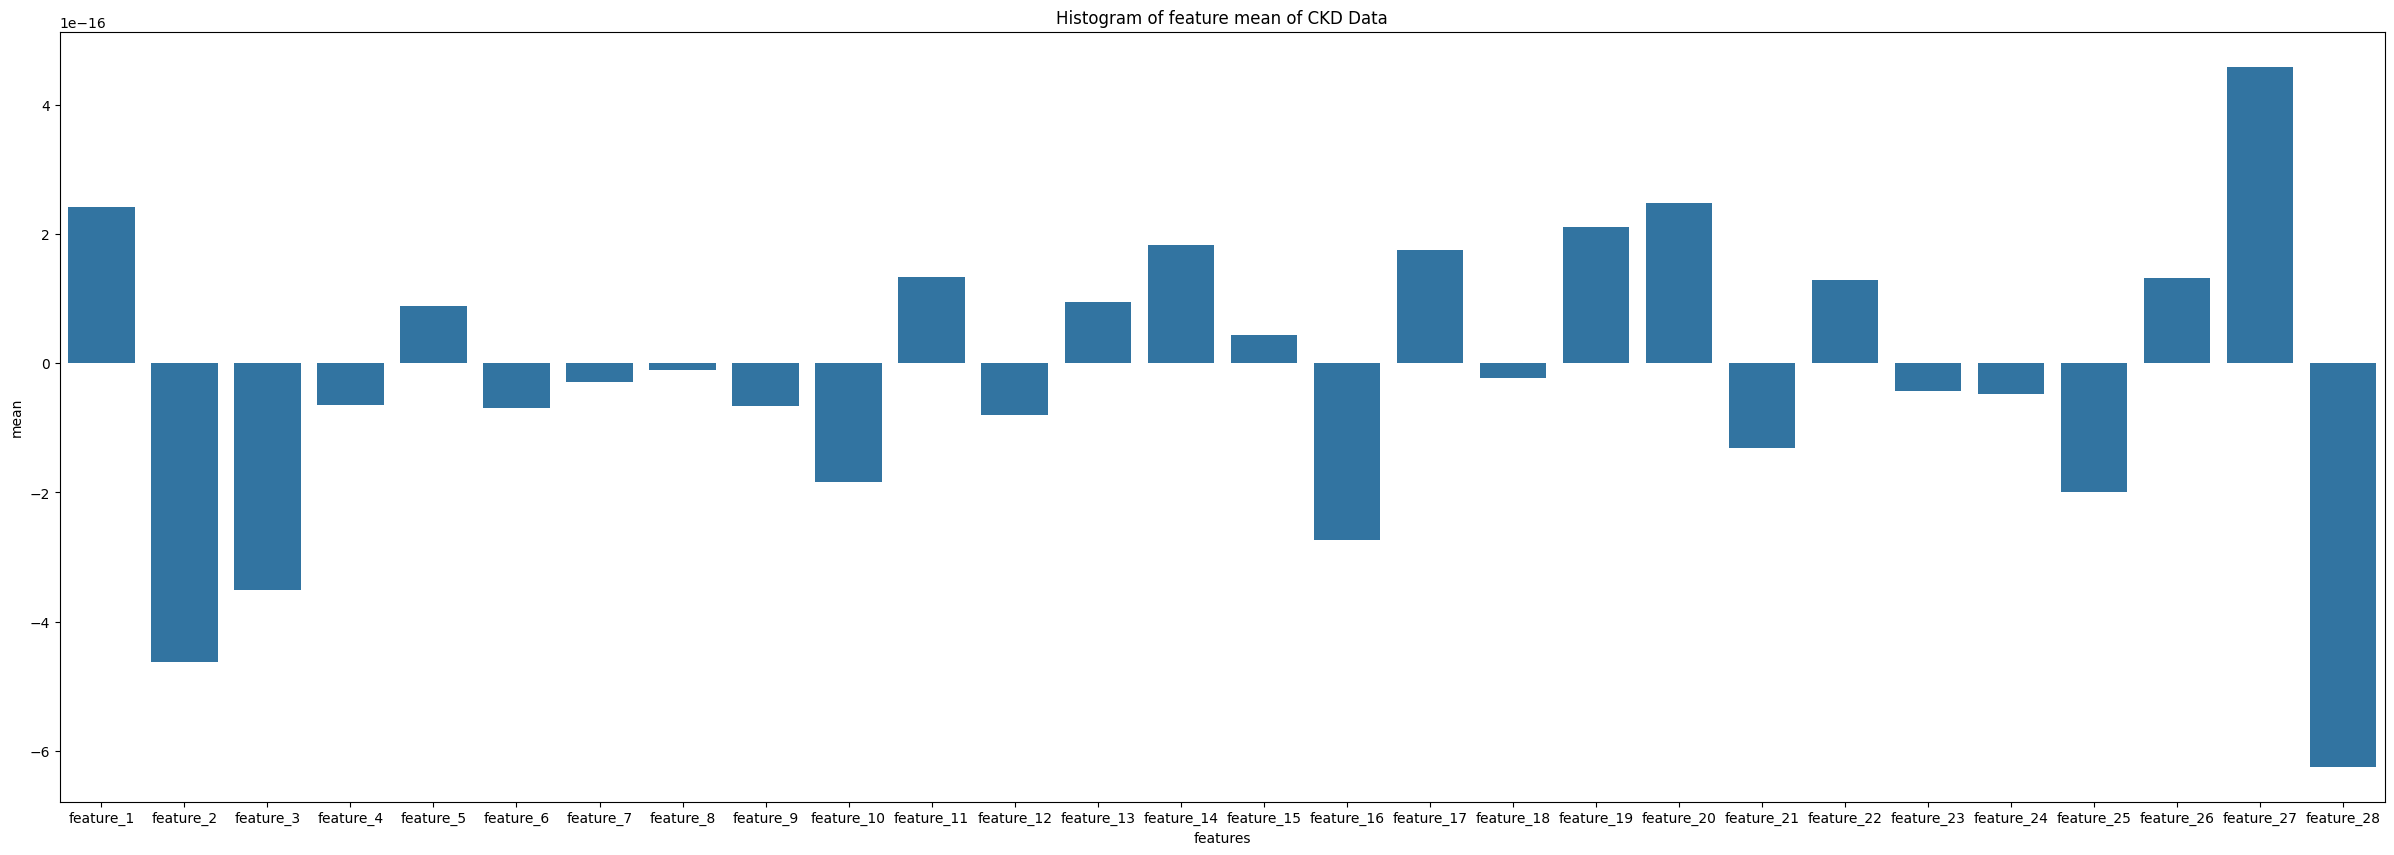

time: 425 ms (started: 2025-02-16 04:26:22 +00:00)


In [9]:
ckd_class_df = ckd_class_df.map({'Normal': 0, 'CKD': 1})

# print(ckd_data) # ID, features, label
# print(ckd_data_df) # no ID

#Plot mean values of standardized datas
plt.figure(figsize=(30, 10))
means = standardized_ckd_data.mean(axis=0)
feature_names = ckd_data_df.columns[1:]
print(means)
sns.barplot(x=feature_names, y=means)
plt.title("Histogram of feature mean of CKD Data")
plt.xlabel("features")
plt.ylabel("mean")
plt.show()

Text(0, 0.5, 'std')

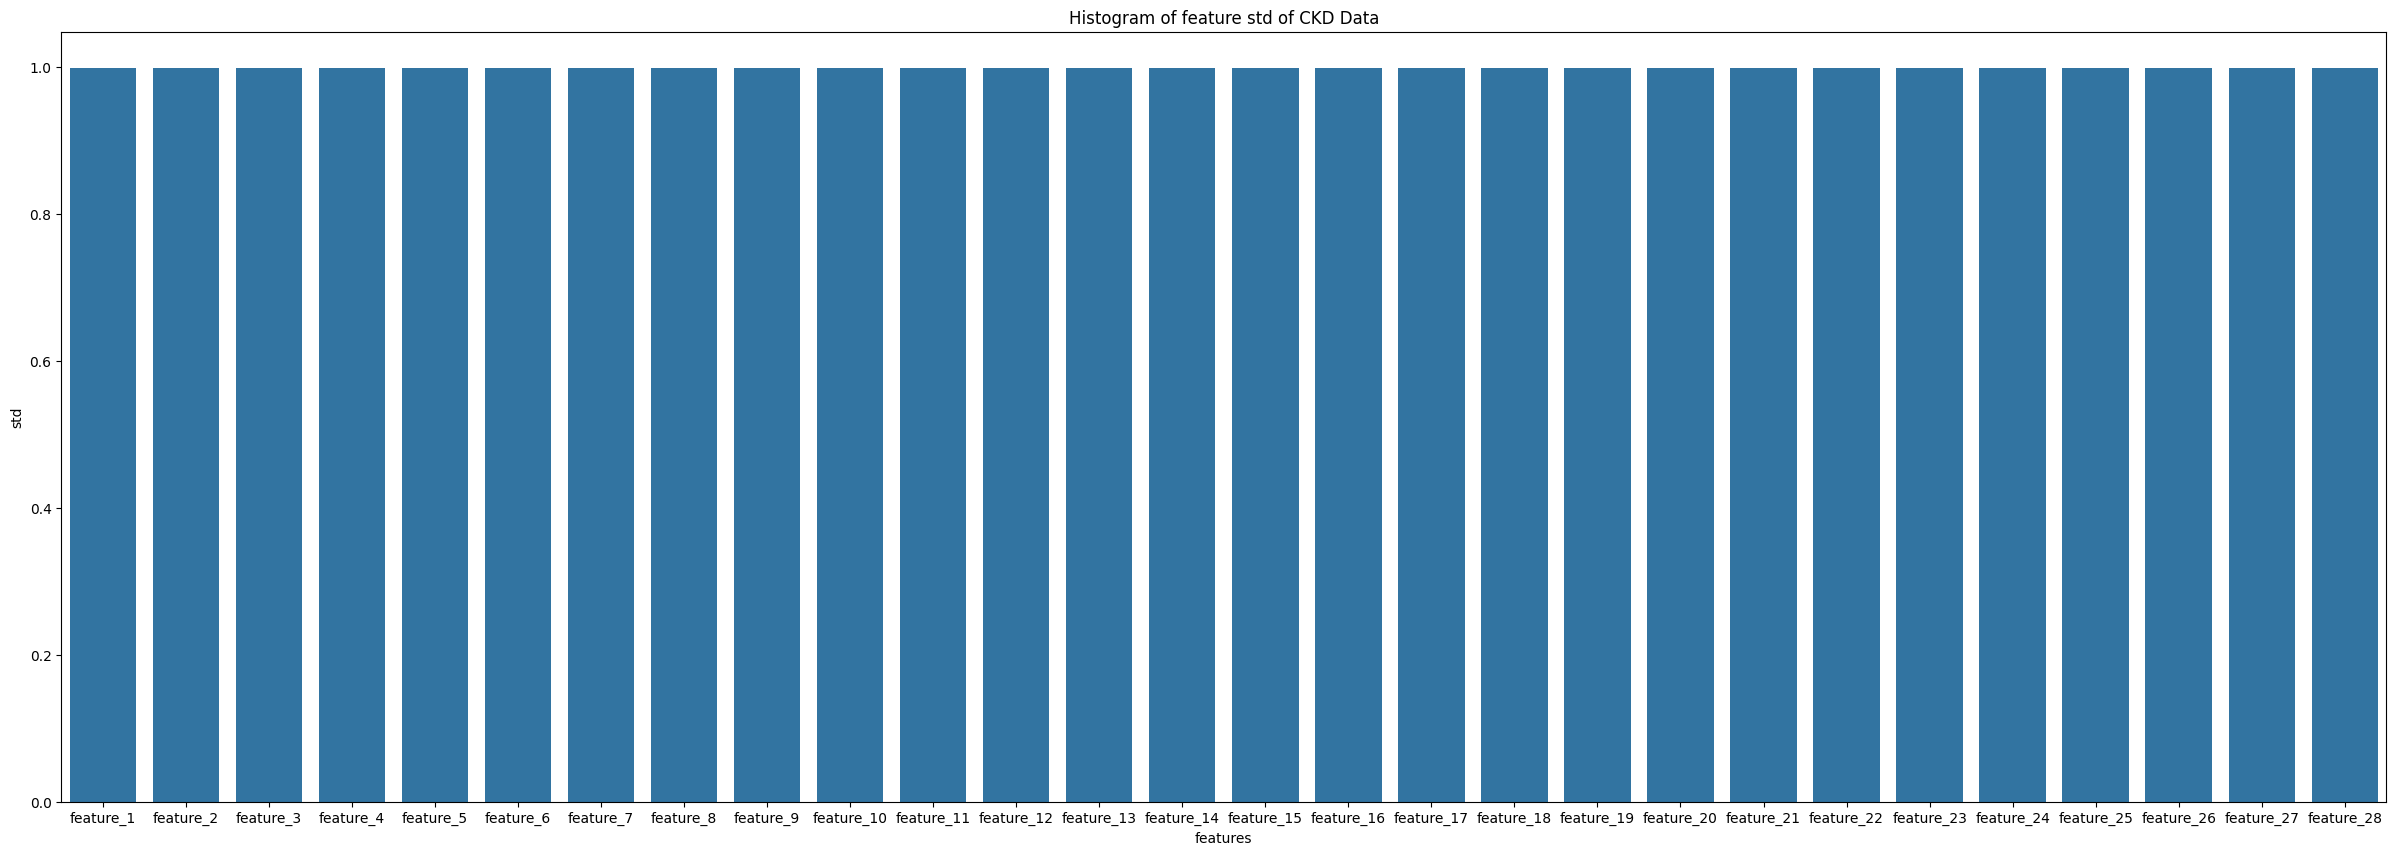

time: 716 ms (started: 2025-02-16 04:26:22 +00:00)


In [10]:
#Plot standard deviation values of standardized datas
plt.figure(figsize=(30, 10))
std_devs = standardized_ckd_data.std(axis=0)
feature_names = ckd_data_df.columns[1:]
sns.barplot(x=feature_names, y=std_devs)
plt.title("Histogram of feature std of CKD Data")
plt.xlabel("features")
plt.ylabel("std")

1    -0.209480
2     0.503478
3    -0.009763
4    -0.000422
5    -0.035488
6     0.010073
7    -0.036394
8    -0.030901
9    -0.059807
10   -0.036208
11    0.054508
12    0.055433
13   -0.012521
14   -0.000290
15   -0.037562
16    0.010011
17   -0.006533
18    0.038169
19    0.013478
20   -0.007203
21    0.044868
22   -0.096758
23   -0.071924
24   -0.019564
25    0.008101
26   -0.008694
27   -0.027539
28    0.017619
Name: label, dtype: float64


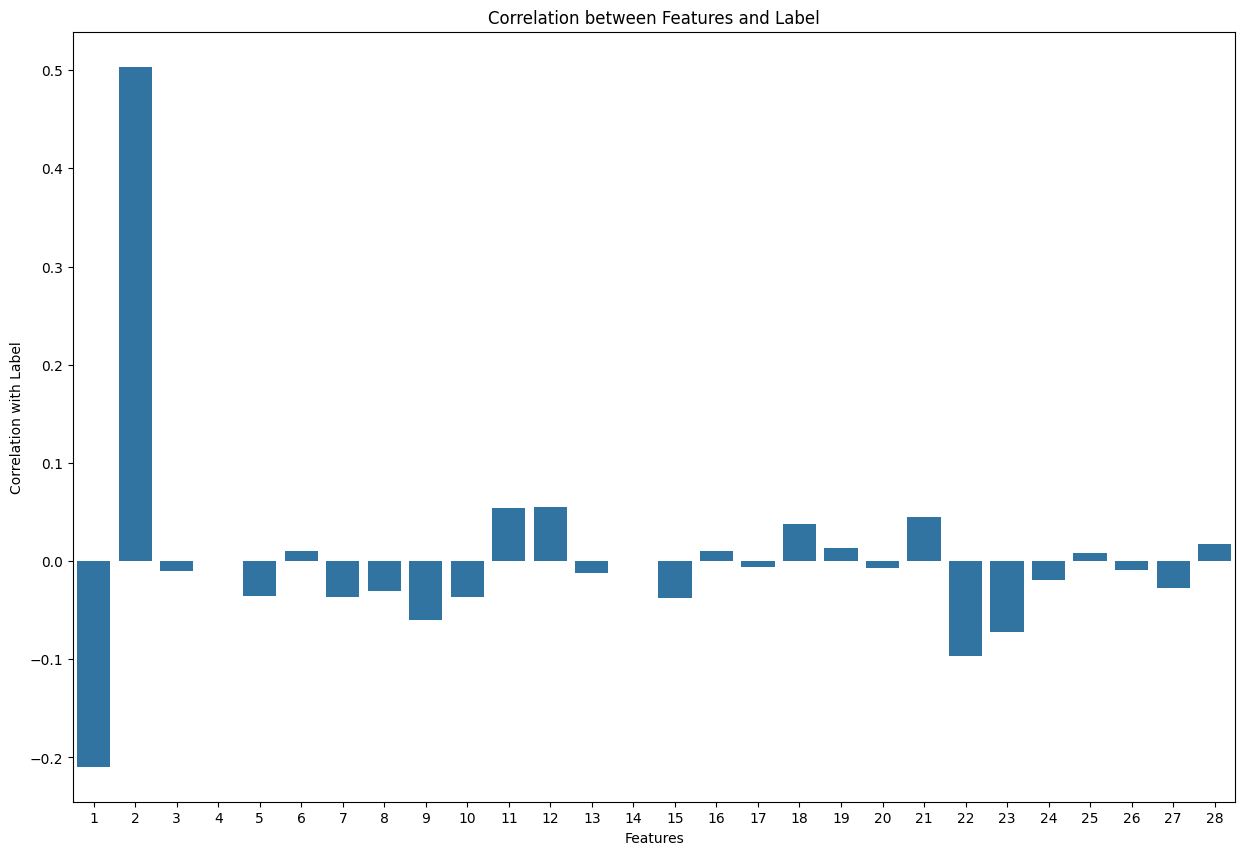

time: 605 ms (started: 2025-02-16 04:26:23 +00:00)


In [11]:
# Plot the correlation of each feature and the label
CKD_correlation_values = None
ckd_data_df = ckd_data.iloc[:, 1:29] # correlaion matrix
ckd_data_df['label'] = ckd_class_df
corr_matrix = ckd_data_df.corr()
feature_corr = corr_matrix['label'].drop('label') # Exclude self-correlation

selected_features = feature_corr


CKD_correlation_values = feature_corr.tolist() # record the correlations down

feature_corr.index = [str(i+1) for i in range(len(feature_corr.index))]
selected_features.index = [str(i+1) for i in range(len(selected_features.index))]
print(feature_corr)

plt.figure(figsize=(15, 10))
sns.barplot(x=selected_features.index, y=selected_features.values)
plt.title('Correlation between Features and Label')
plt.xlabel('Features')
plt.ylabel('Correlation with Label')
plt.show()

#Battery Data Features Distribution Visualization

In [12]:
print(battery_data_df.describe())
print(battery_class_df.value_counts())

               ID   feature_1   feature_2   feature_3   feature_4   feature_5  \
count  732.000000  732.000000  732.000000  732.000000  732.000000  732.000000   
mean   366.500000    0.600059    0.483141    0.487896    0.477138    0.494560   
std    211.454487    0.160144    0.164404    0.293271    0.294747    0.292660   
min      1.000000    0.300700    0.151300    0.001000    0.000200    0.000000   
25%    183.750000    0.494550    0.381800    0.235250    0.221075    0.232075   
50%    366.500000    0.596300    0.488300    0.479050    0.454950    0.496100   
75%    549.250000    0.713675    0.594025    0.733225    0.744325    0.736975   
max    732.000000    0.898800    0.798700    0.999900    0.999100    0.999500   

        feature_6   feature_7   feature_8   feature_9  ...  feature_23  \
count  732.000000  732.000000  732.000000  732.000000  ...  732.000000   
mean     0.493852    0.506217    0.504842    0.505869  ...  154.799180   
std      0.289745    0.290032    0.285327    0.2

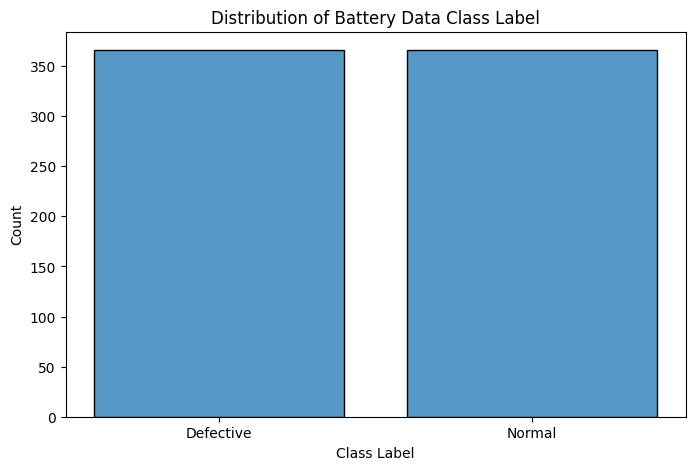

time: 487 ms (started: 2025-02-16 04:26:24 +00:00)


In [13]:
# Plot of class distribution
plt.figure(figsize=(8,5))
sns.histplot(battery_class_df, kde = False, bins = 2, shrink=0.8)
plt.xticks(np.arange(0,2,step=1))
plt.title("Distribution of Battery Data Class Label")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

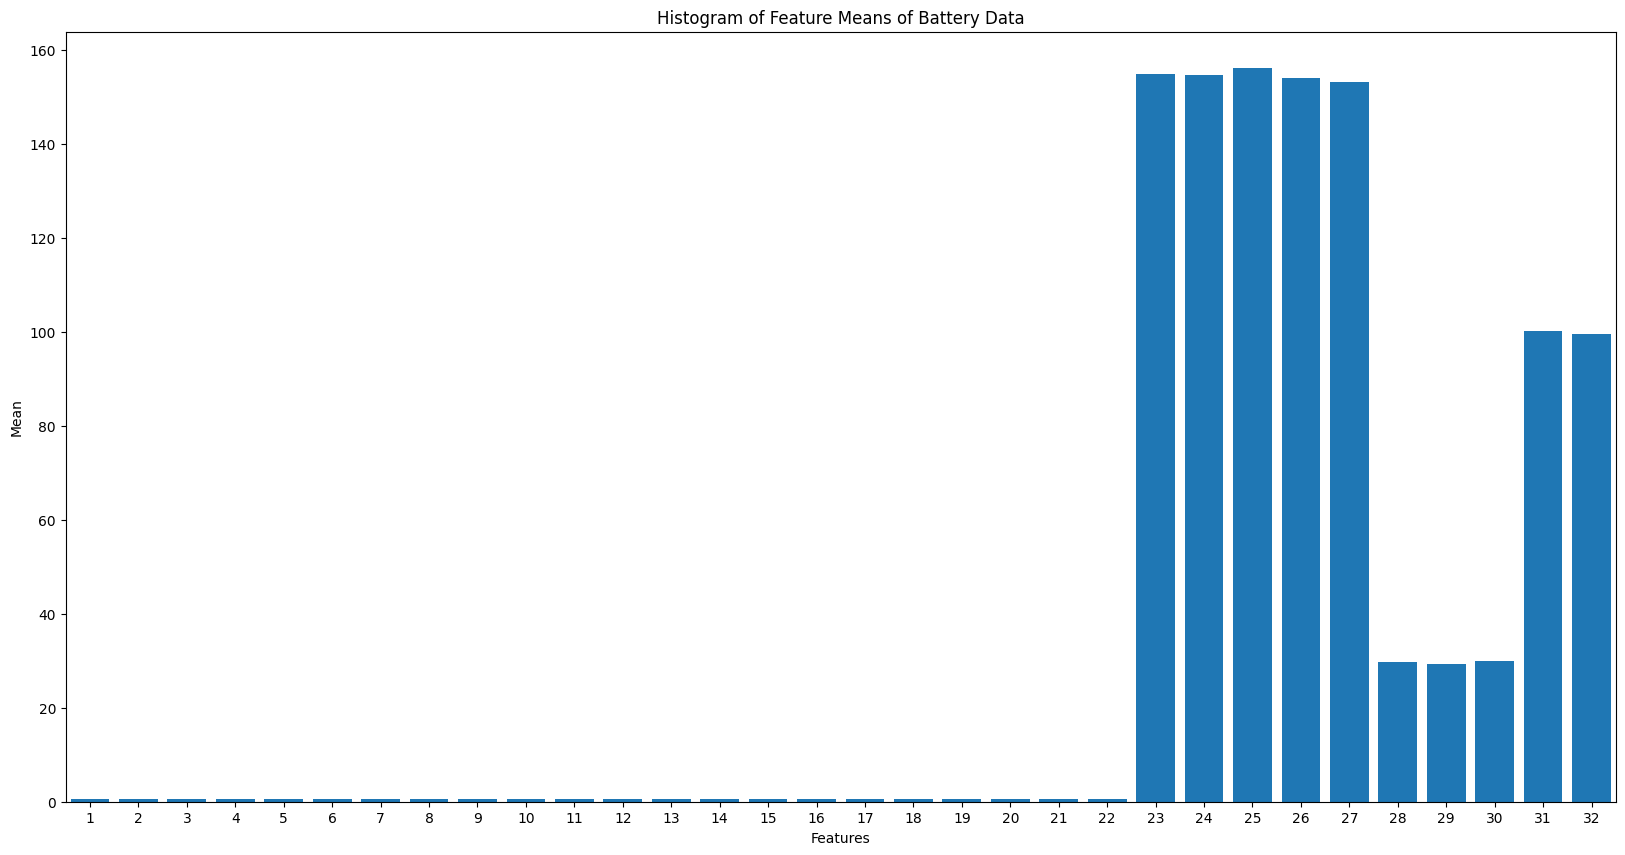

time: 953 ms (started: 2025-02-16 04:26:24 +00:00)


In [14]:
# Plot mean value of raw datas
plt.figure(figsize=(20,10))
#print(battery_data_df.iloc[:,1:33].mean())

# Calculate mean values of the features
means = battery_data_df.iloc[:,1:33].mean()
x_ticks = range(1, len(means)+1)
plt.bar(x_ticks, means.values)

plt.title("Histogram of Feature Means of Battery Data")
plt.xlabel("Features")
plt.ylabel("Mean")
plt.xticks(x_ticks)

# Adjust x-axis limits to remove extra blank space
plt.xlim(0.5, len(means) + 0.5)
plt.show()

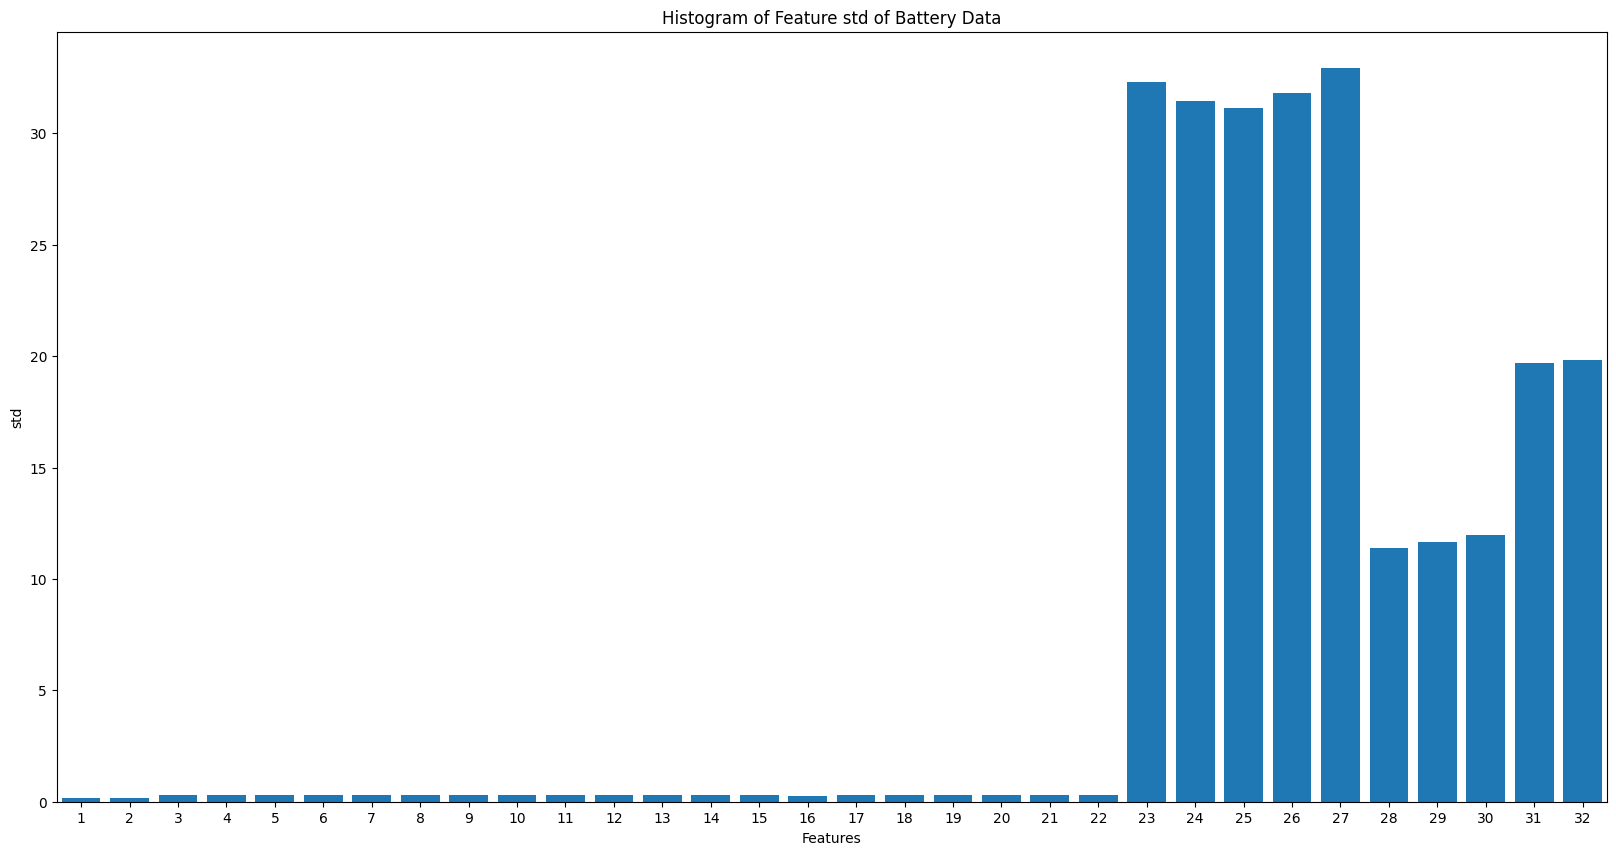

time: 1.04 s (started: 2025-02-16 04:26:25 +00:00)


In [15]:
# Plot standard deviation value of raw datas
plt.figure(figsize=(20, 10))
#print(battery_data_df.iloc[:,1:33].std())
std = battery_data_df.iloc[:,1:33].std()
x_ticks = range(1, len(std)+1)
plt.bar(x_ticks, std.values)

plt.title("Histogram of Feature std of Battery Data")
plt.xlabel("Features")
plt.ylabel("std")
plt.xticks(x_ticks)

# Adjust x-axis limits to remove extra blank space
plt.xlim(0.5, len(std) + 0.5)
plt.show()

[-3.39740379e-16 -3.39740379e-16  1.48029737e-16 -1.00708755e-16
 -1.28616001e-16 -6.79480758e-17  4.91410191e-17  1.01922114e-16
  5.82412078e-17 -5.21744154e-17 -7.28015098e-18 -7.03747928e-17
 -4.85343399e-18 -4.12541889e-17  1.15269057e-16  8.73618118e-17
 -2.76645737e-16 -2.66938869e-17 -8.97885288e-17  1.89283926e-16
 -1.45603020e-16  4.36809059e-17  3.97981587e-16 -4.38022417e-16
 -6.55213588e-17 -3.76141134e-16 -1.45603020e-17  1.89283926e-16
 -1.84430492e-16  4.85343399e-18  2.85139247e-16 -9.10018873e-17]


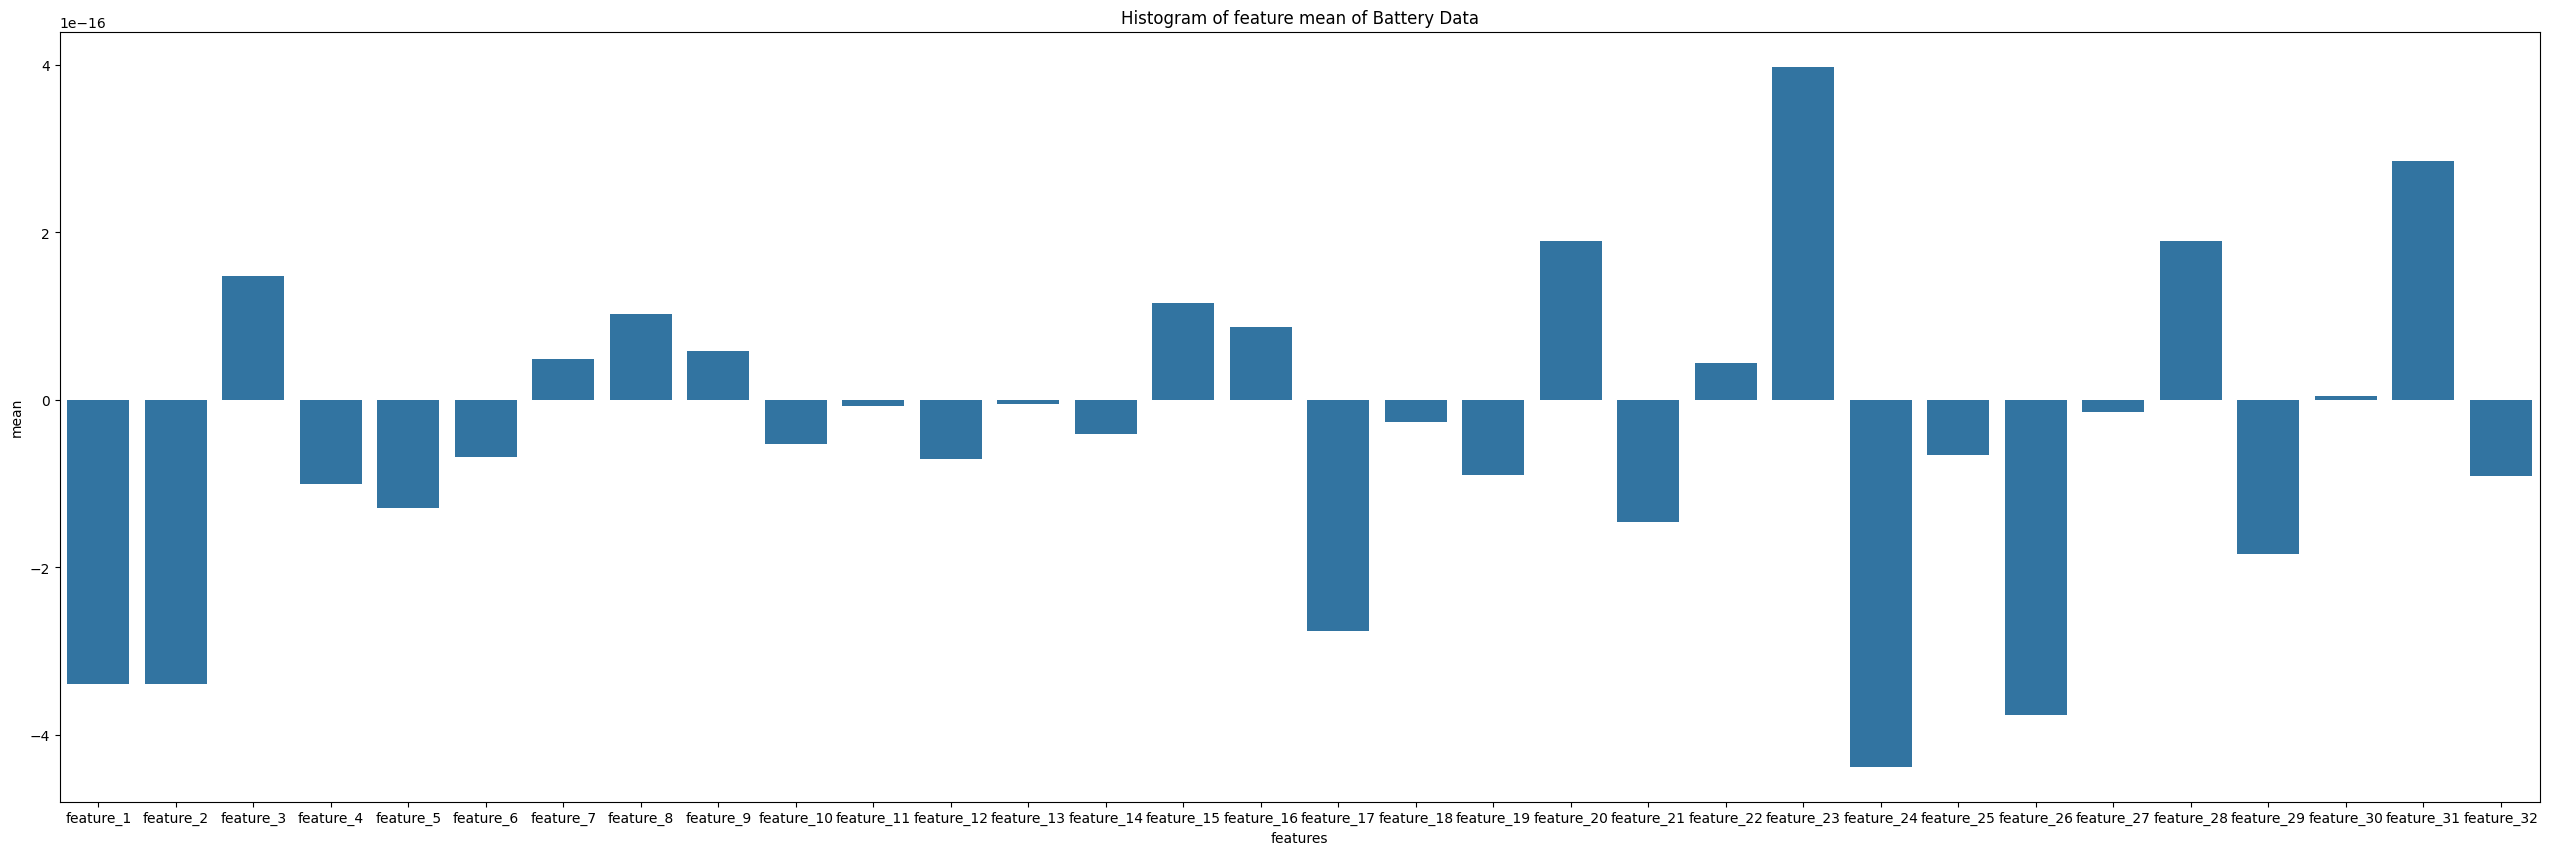

time: 1.03 s (started: 2025-02-16 04:26:26 +00:00)


In [16]:
battery_class_df = battery_class_df.map({'Normal': 0, 'Defective': 1})
#Plot mean values of standardized datas
plt.figure(figsize=(32, 10))
means = standardized_battery_data.mean(axis=0)
feature_names = battery_data_df.columns[1:]
print(means)
sns.barplot(x=feature_names, y=means)
plt.title("Histogram of feature mean of Battery Data")
plt.xlabel("features")
plt.ylabel("mean")
plt.show()

[0.99931671 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671
 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671
 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671
 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671
 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671 0.99931671
 0.99931671 0.99931671]


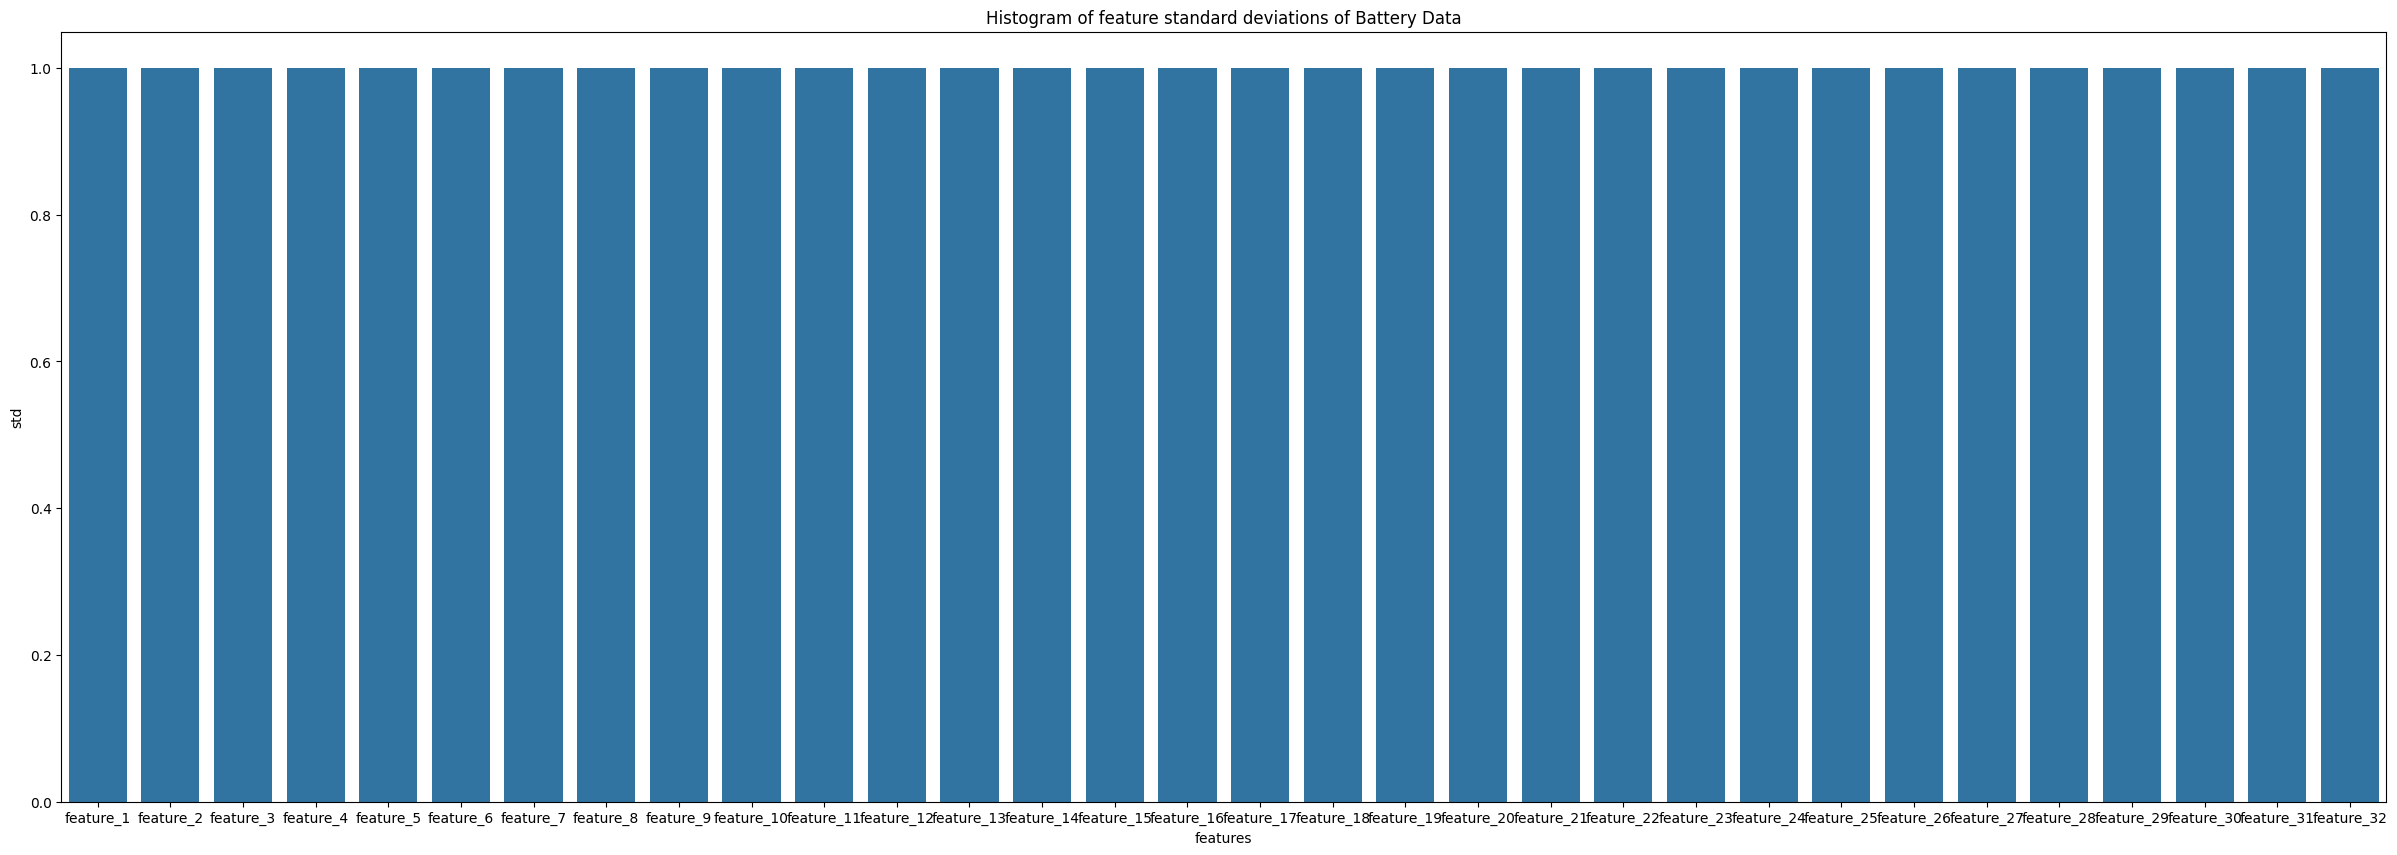

time: 911 ms (started: 2025-02-16 04:26:27 +00:00)


In [17]:
#Plot standard deviation values of standardized datas
plt.figure(figsize=(30, 10))
std = standardized_battery_data.std(axis=0)
feature_names = battery_data_df.columns[1:]
print(std)
sns.barplot(x=feature_names, y=std)
plt.title("Histogram of feature standard deviations of Battery Data")
plt.xlabel("features")
plt.ylabel("std")
plt.show()

1     0.678332
2     0.671423
3     0.008470
4     0.040967
5     0.017053
6    -0.028460
7    -0.076682
8    -0.027737
9    -0.036876
10   -0.009616
11    0.010247
12    0.005751
13    0.020910
14   -0.047782
15   -0.020237
16   -0.038905
17    0.014431
18   -0.019100
19    0.016188
20   -0.008990
21   -0.005216
22    0.030937
23    0.017996
24    0.058208
25    0.025114
26   -0.045355
27    0.012750
28   -0.035143
29   -0.030512
30   -0.004811
31   -0.001386
32   -0.035329
Name: label, dtype: float64


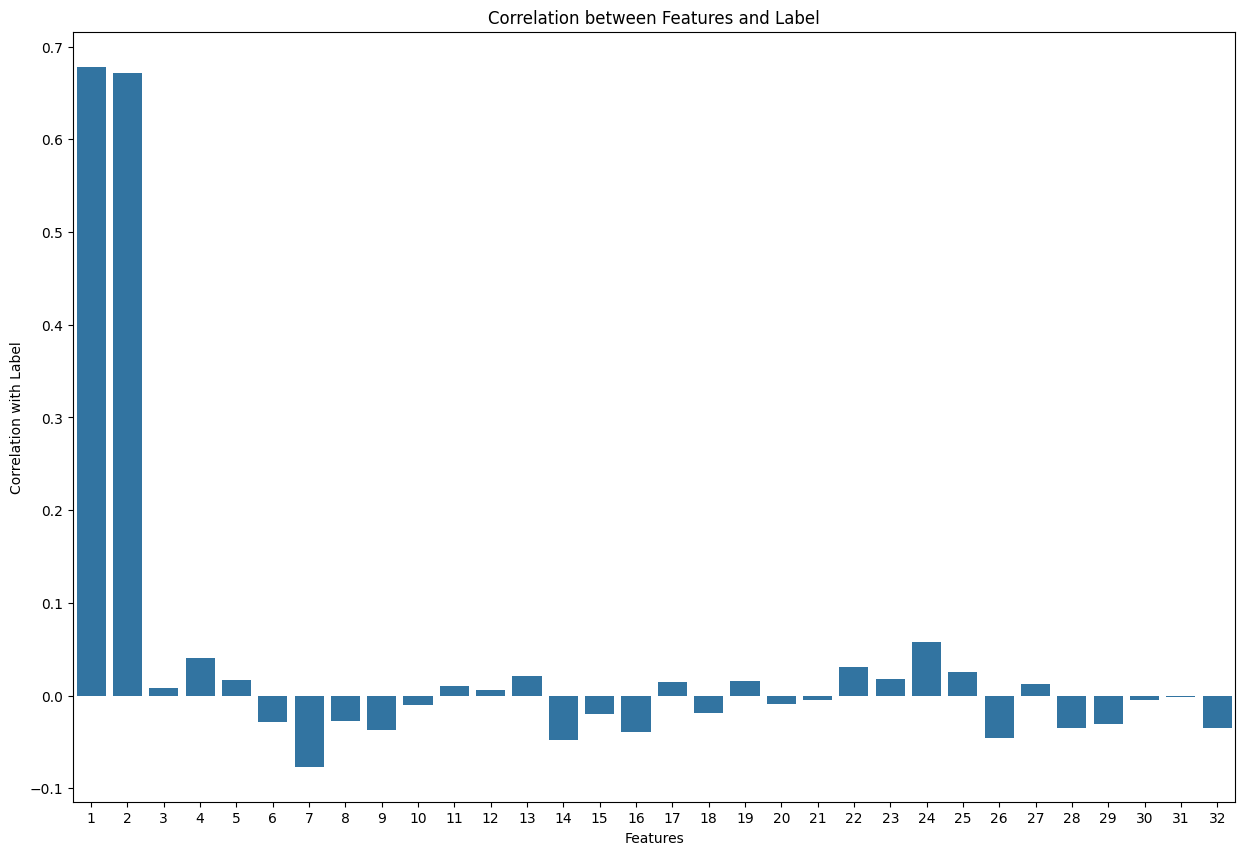

time: 578 ms (started: 2025-02-16 04:26:28 +00:00)


In [18]:
# Plot the correlation of each feature and the label
battery_data_correlation_values = None
battery_data_df = battery_data.iloc[:, 1:33]
battery_data_df['label'] = battery_class_df
corr_matrix = battery_data_df.corr()
feature_corr = corr_matrix['label'].drop('label') # Exclude self-correlation

selected_features = feature_corr

battery_data_correlation_values = feature_corr.tolist() # record the correlations down

feature_corr.index = [str(i+1) for i in range(len(feature_corr.index))]
selected_features.index = [str(i+1) for i in range(len(selected_features.index))]
print(feature_corr)

plt.figure(figsize=(15, 10))
sns.barplot(x=selected_features.index, y=selected_features.values)
plt.title('Correlation between Features and Label')
plt.xlabel('Features')
plt.ylabel('Correlation with Label')
plt.show()

#Implementation of the Logistic Regression Algorithm

In [19]:
class LogisticRegression:
    def __init__(self, regularization=None, penalty=0.1, learning_rate=0.01, num_epochs=1000):
        self.regularization = regularization
        self.penalty = penalty
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None

    def sigmoid(self, z):
        z = np.clip(z, -709, 709)  # To avoid overflow
        return 1 / (1 + np.exp(-z))

    def loss(self, y_pred, y, W):
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        loss1 = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        loss2 = 0
        if self.regularization == 'l1':
            loss2 = self.penalty * np.sum(np.abs(W[1:]))  # Exclude bias term
        elif self.regularization == 'l2':
            loss2 = (self.penalty / 2) * np.sum(W[1:] ** 2)  # Exclude bias term
        return loss1 + loss2

    def gradient_descent(self, X_bias, y_hat, y, W):
        grad1 = -(X_bias.T.dot((y - y_hat)) / y.shape[0])
        grad2 = np.zeros_like(W)
        if self.regularization == 'l1':
            grad2[1:] = self.penalty * np.sign(W[1:])  # No regularization on bias
        elif self.regularization == 'l2':
            grad2[1:] = 2 * self.penalty * W[1:]
        return grad1 + grad2

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)  # Include bias
        X_bias = np.hstack((np.ones((n_samples, 1)), X))
        start_time = time.time()
        self.loss_history = []

        for _ in range(self.num_epochs):
            linear_model = np.dot(X_bias, self.weights)
            y_pred = self.sigmoid(linear_model)

            current_loss = self.loss(y_pred, y, self.weights)
            self.loss_history.append(current_loss)

            dw = self.gradient_descent(X_bias, y_pred, y, self.weights)
            self.weights -= self.learning_rate * dw


        end_time = time.time()
        self.train_time = end_time - start_time

    def predict(self, X):
        n = X.shape[0]
        X_bias = np.hstack((np.ones((n, 1)), X))
        linear_model = np.dot(X_bias, self.weights)  # No self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

    def get_training_time(self):
        return self.train_time

    def z_score_normalize(X, normalized_indices=None):
        X = X.astype(float)  # Ensure data type consistency
        X_normalized = X.copy()  # Copy the dataset to avoid modifying original data

        num_features = X.shape[1]

        for i in range(num_features):
          if normalized_indices is None or i not in normalized_indices:
            mean = np.mean(X[:, i])
            std = np.std(X[:, i])

            # Avoid division by zero if std is 0
            if std > 0:
                X_normalized[:, i] = (X[:, i] - mean) / std

        return X_normalized




time: 1.92 ms (started: 2025-02-16 04:26:29 +00:00)


#A function to evaluate the models' accuracy

In [20]:
def Accu_eval(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

time: 374 µs (started: 2025-02-16 04:26:29 +00:00)


#k-fold cross validation

In [21]:
def k_fold_validation(model, X, y, k=10):
    indices = np.arange(len(X))

    np.random.seed(42)  # Set seed for reproducibility
    np.random.shuffle(indices)

    folds = np.array_split(indices, k)  # Splitting data into K folds
    accuracies = []

    for i in range(k):
        val_idx = folds[i]  # Current validation fold indices
        train_idx = np.hstack([folds[j] for j in range(k) if j != i])  # Train on remaining folds

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        model.fit(X_train, y_train)
        predictions = model.predict(X_val)

        accuracy = Accu_eval(y_val, predictions)
        accuracies.append(accuracy)

    return np.mean(accuracies)


time: 779 µs (started: 2025-02-16 04:26:29 +00:00)


In [22]:
# Evaluating Metrics
def evaluate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    false_positive_rate = FP / (FP + TN) if (FP + TN) > 0 else 0

    return {
        "TP": TP,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "False Positive Rate": false_positive_rate
    }

time: 817 µs (started: 2025-02-16 04:26:29 +00:00)


In [23]:
# Divide into train and test datasets
def train_test_split(df, train_size=0.7, shuffle=True):
  if shuffle:
    df_shuffled = df.sample(frac=1, random_state=42)
  else:
    df_shuffled = df
  split = int(train_size * len(df))

  train_set = df_shuffled[:split]
  test_set = df_shuffled[split:]
  return train_set, test_set

time: 485 µs (started: 2025-02-16 04:26:29 +00:00)


CKD Dataset Accuracy: 0.5636
Battery Dataset Accuracy: 0.5341


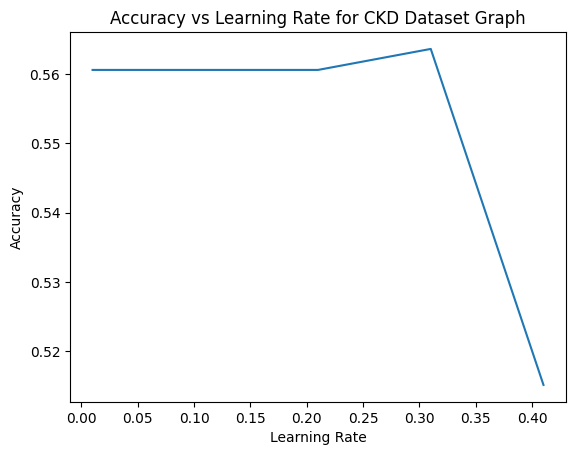

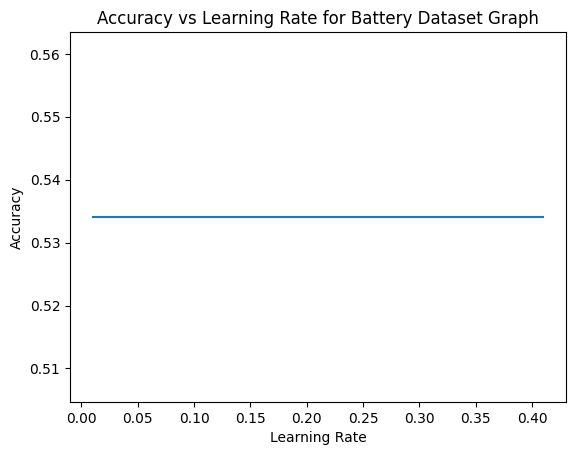

CKD Dataset Accuracy after train test split: 0.5696
Battery Dataset Accuracy after train test split: 0.4922
time: 18.5 s (started: 2025-02-16 04:26:29 +00:00)


In [24]:
# Initialize model
learning_rate = [0.01, 0.05, 0.1, 0.5]
model_types = ["default", "l1 regularization", "l2 regularization", "feature selection"]
model = LogisticRegression("l1",learning_rate=0.3, num_epochs=1000)

# Perform manual cross-validation
ckd_accuracy = k_fold_validation(model, ckd_data_df.values, ckd_class_df.values)
battery_accuracy = k_fold_validation(model, battery_data_df.values, battery_class_df.values)
print(f'CKD Dataset Accuracy: {ckd_accuracy:.4f}')
print(f'Battery Dataset Accuracy: {battery_accuracy:.4f}')

# graphs the accuracy over range of learning rates
test = {}
x = 0.01
while x < 0.5:
  model = LogisticRegression("l1",learning_rate=x, num_epochs=1000)
  accuracy = k_fold_validation(model, ckd_data_df.values, ckd_class_df.values)
  test[x] = accuracy
  x = x + 0.1
plt.plot(list(test.keys()), list(test.values()))
plt.title("Accuracy vs Learning Rate for CKD Dataset Graph")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

# same for battery dataset
test = {}
x = 0.01
while x < 0.5:
  model = LogisticRegression("l1",learning_rate=x, num_epochs=1000)
  accuracy = k_fold_validation(model, battery_data_df.values, battery_class_df.values)
  test[x] = accuracy
  x = x + 0.1
plt.plot(list(test.keys()), list(test.values()))
plt.title("Accuracy vs Learning Rate for Battery Dataset Graph")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

# Divide into train and test datasets
def train_test_split(df, train_size=0.7, shuffle=True):
  if shuffle:
    df_shuffled = df.sample(frac=1, random_state=42)
  else:
    df_shuffled = df
  split = int(train_size * len(df))

  train_set = df_shuffled[:split]
  test_set = df_shuffled[split:]
  return train_set, test_set


ckd_data['label'] = ckd_data['label'].map({'CKD': 1, 'Normal': 0})
train_ckd, test_ckd = train_test_split(ckd_data)
train_ckd_x = train_ckd.iloc[:,:-1].to_numpy()
train_ckd_y = train_ckd.iloc[:,-1].to_numpy()
test_ckd_x = test_ckd.iloc[:,:-1].to_numpy()
test_ckd_y = test_ckd.iloc[:,-1].to_numpy()
model = LogisticRegression("l1",learning_rate=0.3, num_epochs=1000)
accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)
print(f'CKD Dataset Accuracy after train test split: {accuracy:.4f}')

battery_data['label'] = battery_data['label'].map({'Defective': 1, 'Normal': 0})
train_bat, test_bat = train_test_split(battery_data)
train_bat_x = train_bat.iloc[:,:-1].to_numpy()
train_bat_y = train_bat.iloc[:,-1].to_numpy()
test_bat_x = test_bat.iloc[:,:-1].to_numpy()
test_bat_y = test_bat.iloc[:,-1].to_numpy()
model = LogisticRegression("l1",learning_rate=0.3, num_epochs=1000)
accuracy = k_fold_validation(model, train_bat_x, train_bat_y)
print(f'Battery Dataset Accuracy after train test split: {accuracy:.4f}')

In [25]:
# Train the model on CKD dataset
model = LogisticRegression("l1", learning_rate=0.3, num_epochs=1000)
model.fit(train_ckd_x, train_ckd_y)
print("Shape of train_ckd_x:", train_ckd_x.shape)
print("Shape of test_ckd_x:", test_ckd_x.shape)
print("Shape of self.weights:", model.weights.shape)


ckd_predictions = model.predict(test_ckd_x)
ckd_accuracy = Accu_eval(test_ckd_y, ckd_predictions)
print(f'CKD Dataset Accuracy (direct evaluation): {ckd_accuracy:.4f}')

# Train the model on Battery dataset
model.fit(train_bat_x, train_bat_y)
battery_predictions = model.predict(test_bat_x)
battery_accuracy = Accu_eval(test_bat_y, battery_predictions)
print(f'Battery Dataset Accuracy (direct evaluation): {battery_accuracy:.4f}')


Shape of train_ckd_x: (230, 29)
Shape of test_ckd_x: (100, 29)
Shape of self.weights: (30,)
CKD Dataset Accuracy (direct evaluation): 0.4900
Battery Dataset Accuracy (direct evaluation): 0.5182
time: 278 ms (started: 2025-02-16 04:26:47 +00:00)


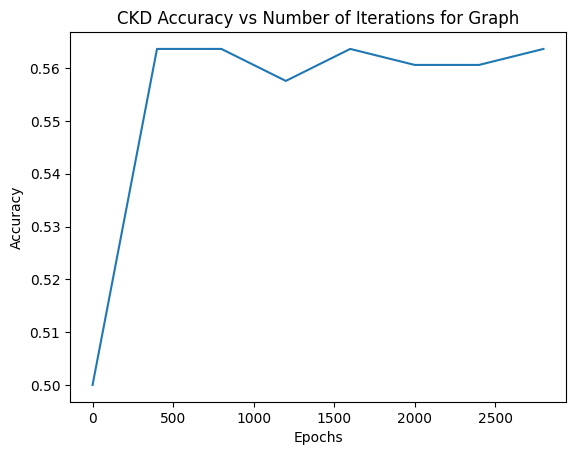

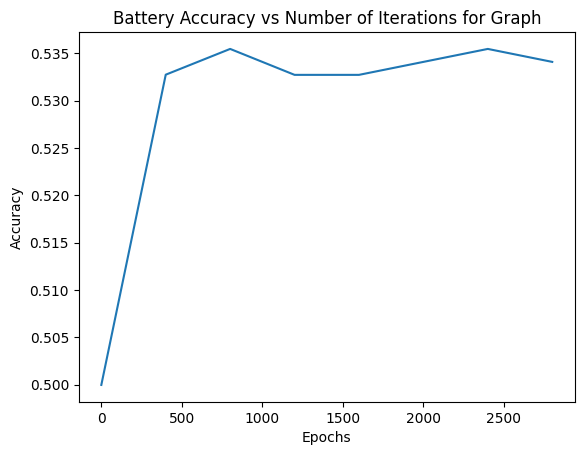

time: 22.1 s (started: 2025-02-16 04:26:48 +00:00)


In [26]:
# graphs accuracy over range of epochs:
test2 = {}
x = 0
while x < 3000:
  model = LogisticRegression("l1",learning_rate=0.3, num_epochs=x)
  accuracy = k_fold_validation(model, ckd_data_df.values, ckd_class_df.values)
  test2[x] = accuracy
  x = x + 400
plt.plot(list(test2.keys()), list(test2.values()))
plt.title("CKD Accuracy vs Number of Iterations for Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

test2 = {}
x = 0
while x < 3000:
  model = LogisticRegression("l1",learning_rate=0.3, num_epochs=x)
  accuracy = k_fold_validation(model, battery_data_df.values, battery_class_df.values)
  test2[x] = accuracy
  x = x + 400
plt.plot(list(test2.keys()), list(test2.values()))
plt.title("Battery Accuracy vs Number of Iterations for Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Increasing model accuracy

In [27]:
# Identify features to remove based on correlation threshold
features_to_remove = []
for i, corr in enumerate(CKD_correlation_values):
    if abs(corr) < 0.01:  # Threshold for feature removal
        features_to_remove.append(f'feature_{i + 1}')

# Create a modified copy of the dataset with the features removed
train_ckd_modified = train_ckd.drop(features_to_remove, axis=1).copy()

# Extract features and target variable
train_ckd_x = train_ckd_modified.iloc[:, :-1].to_numpy()
train_ckd_y = train_ckd_modified.iloc[:, -1].to_numpy()

# Train and validate the model
model = LogisticRegression("l2", learning_rate=0.01, num_epochs=1000)
accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)

# Print accuracy after feature removal
print("CKD accuracy after removing subset of features:", accuracy)


CKD accuracy after removing subset of features: 0.5608695652173913
time: 519 ms (started: 2025-02-16 04:27:10 +00:00)


In [28]:
train_ckd, test_ckd = train_test_split(ckd_data)

from copy import deepcopy
original_train_x = deepcopy(train_ckd_x)
original_test_x = deepcopy(test_ckd_x)

print("Squaring features: ")
for x in range(3): # change to 28 for full features
  index = x + 1
  train_ckd_x = np.hstack((original_train_x, original_train_x[:, index:index+1] ** 2))
  test_ckd_x = np.hstack((original_test_x, original_test_x[:, index:index+1] ** 2))

  model = LogisticRegression("l1",learning_rate=index, num_epochs=1000)
  accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)
  print(index, accuracy)

print("Cubing features: ")
for x in range(3): # change to 28 for full features
  index = x + 1
  train_ckd_x = np.hstack((original_train_x, original_train_x[:, index:index+1] ** 3))
  test_ckd_x = np.hstack((original_test_x, original_test_x[:, index:index+1] ** 3))

  model = LogisticRegression("l1",learning_rate=index, num_epochs=1000)
  accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)
  print(index, accuracy)

epsilon = 1e-5 # add to functions to avoid zeroes

print("Log of features: ")
for x in range(3):
  index = x + 1
  train_log = np.log(original_train_x[:, index:index+1] + epsilon)
  test_log = np.log(original_test_x[:, index:index+1] + epsilon)

  train_ckd_x = np.hstack((original_train_x, train_log))
  test_ckd_x = np.hstack((original_test_x, test_log))

  model = LogisticRegression("l1",learning_rate=index, num_epochs=1000)
  accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)
  print(index, accuracy)

print("Square root of features: ")
for x in range(3):
  index = x + 1

  train_sqrt = np.sqrt(original_train_x[:, index:index+1])
  test_sqrt = np.sqrt(original_test_x[:, index:index+1])

  train_ckd_x = np.hstack((original_train_x, train_sqrt))
  test_ckd_x = np.hstack((original_test_x, test_sqrt))

  model = LogisticRegression("l1",learning_rate=index, num_epochs=1000)
  accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)
  print(index, accuracy)

print("Reciprocal of features: ")
for x in range(3):
  index = x + 1

  train_ckd_x = np.hstack((original_train_x, 1 / (original_train_x[:, index:index+1] + epsilon)))

  model = LogisticRegression("l1",learning_rate=index, num_epochs=1000)
  accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)
  print(index, accuracy)

print("Multiplication of pairs of features: ")
for x in range(3):
  index = x + 1

  train_ckd_x = np.hstack((original_train_x, original_train_x[:, index:index+1] * original_train_x[:, index+1:index+2]))

  model = LogisticRegression("l1",learning_rate=index, num_epochs=1000)
  accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)
  print(index, accuracy)

print("Sin of features: ")
for x in range(3):
  index = x + 1

  train_ckd_x = np.hstack((train_ckd_x, np.sin(train_ckd_x[:, index:index+1])))

  model = LogisticRegression("l1",learning_rate=index, num_epochs=1000)
  accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)
  print(index, accuracy)

Squaring features: 
1 0.5608695652173913
2 0.5608695652173913
3 0.5608695652173913
Cubing features: 
1 0.5652173913043479
2 0.5608695652173913
3 0.5652173913043479
Log of features: 
1 0.5652173913043479
2 0.5608695652173913
3 0.5695652173913043
Square root of features: 
1 0.5608695652173913
2 0.5608695652173913
3 0.5652173913043478
Reciprocal of features: 
1 0.5652173913043479
2 0.5652173913043479
3 0.5608695652173912
Multiplication of pairs of features: 
1 0.5652173913043479
2 0.5608695652173913
3 0.5608695652173913
Sin of features: 
1 0.5608695652173913
2 0.5608695652173913
3 0.5608695652173913
time: 12.5 s (started: 2025-02-16 04:27:10 +00:00)


# Standarizing the data

In [29]:
# Load data
ckd_data = pd.read_csv('/content/gdrive/MyDrive/ECSE551/CKD.csv')
battery_data = pd.read_csv('/content/gdrive/MyDrive/ECSE551/Battery_Dataset.csv')

# Extract features and labels
ckd_features = ckd_data.iloc[:, 1:29].copy()
ckd_labels = ckd_data['label'].map({'Normal': 0, 'CKD': 1})

battery_features = battery_data.iloc[:, 1:33].copy()
battery_labels = battery_data['label'].map({'Normal': 0, 'Defective': 1})

# Normalize specific feature ranges
def z_score_normalize(X, start, end):
    X = X.astype(float)  # Ensure consistency
    for i in range(start, end):
        mean = np.mean(X[:, i])
        std = np.std(X[:, i])
        if std > 0:
            X[:, i] = (X[:, i] - mean) / std
    return X

ckd_features = ckd_features.to_numpy()
ckd_features = z_score_normalize(ckd_features, 20, 28)

battery_features = battery_features.to_numpy()
battery_features = z_score_normalize(battery_features, 22, 32)

ckd_X, ckd_y = ckd_features, ckd_labels.to_numpy()
battery_X, battery_y = battery_features, battery_labels.to_numpy()

time: 17.2 ms (started: 2025-02-16 04:27:23 +00:00)


In [30]:
# Initialize model
model = LogisticRegression(learning_rate=0.3, num_epochs=1000)

# Perform k-fold cross-validation
ckd_kfold_accuracy = k_fold_validation(model, ckd_X, ckd_y)
battery_kfold_accuracy = k_fold_validation(model, battery_X, battery_y)

# Train the model on the full dataset
model.fit(ckd_X, ckd_y)
ckd_predictions = model.predict(ckd_X)
ckd_accu_eval = Accu_eval(ckd_y, ckd_predictions)

model.fit(battery_X, battery_y)
battery_predictions = model.predict(battery_X)
battery_accu_eval = Accu_eval(battery_y, battery_predictions)

# Evaluate additional metrics
ckd_metrics = evaluate_metrics(ckd_y, ckd_predictions)
battery_metrics = evaluate_metrics(battery_y, battery_predictions)

print(f'CKD Dataset Accuracy (k-fold validation): {ckd_kfold_accuracy:.4f}')
print(f'CKD Dataset Accuracy (Accu_eval direct evaluation): {ckd_accu_eval:.4f}')
print(f'Battery Dataset Accuracy (k-fold validation): {battery_kfold_accuracy:.4f}')
print(f'Battery Dataset Accuracy (Accu_eval direct evaluation): {battery_accu_eval:.4f}')

# Print detailed evaluation metrics
print("\n=== CKD Dataset Metrics ===")
print(f'True Positives (TP): {ckd_metrics["TP"]}')
print(f'True Negatives (TN): {ckd_metrics["TN"]}')
print(f'False Positives (FP): {ckd_metrics["FP"]}')
print(f'False Negatives (FN): {ckd_metrics["FN"]}')
print(f'Precision: {ckd_metrics["Precision"]:.4f}')
print(f'Recall: {ckd_metrics["Recall"]:.4f}')
print(f'False Positive Rate: {ckd_metrics["False Positive Rate"]:.4f}')

print("\n=== Battery Dataset Metrics ===")
print(f'True Positives (TP): {battery_metrics["TP"]}')
print(f'True Negatives (TN): {battery_metrics["TN"]}')
print(f'False Positives (FP): {battery_metrics["FP"]}')
print(f'False Negatives (FN): {battery_metrics["FN"]}')
print(f'Precision: {battery_metrics["Precision"]:.4f}')
print(f'Recall: {battery_metrics["Recall"]:.4f}')
print(f'False Positive Rate: {battery_metrics["False Positive Rate"]:.4f}')



CKD Dataset Accuracy (k-fold validation): 0.6515
CKD Dataset Accuracy (Accu_eval direct evaluation): 0.7333
Battery Dataset Accuracy (k-fold validation): 0.8552
Battery Dataset Accuracy (Accu_eval direct evaluation): 0.8743

=== CKD Dataset Metrics ===
True Positives (TP): 117
True Negatives (TN): 125
False Positives (FP): 40
False Negatives (FN): 48
Precision: 0.7452
Recall: 0.7091
False Positive Rate: 0.2424

=== Battery Dataset Metrics ===
True Positives (TP): 318
True Negatives (TN): 322
False Positives (FP): 44
False Negatives (FN): 48
Precision: 0.8785
Recall: 0.8689
False Positive Rate: 0.1202
time: 1.58 s (started: 2025-02-16 04:27:23 +00:00)


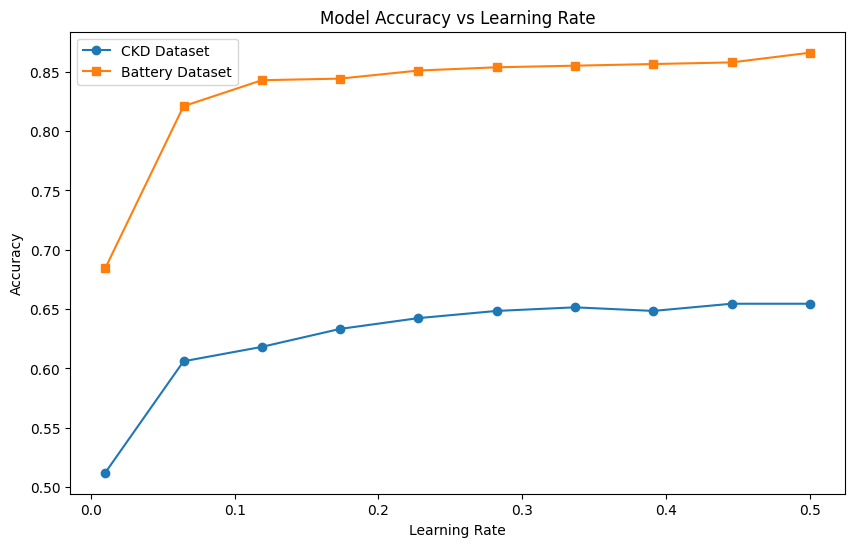

time: 17.1 s (started: 2025-02-16 04:27:24 +00:00)


In [31]:
# graphs the accuracy over range of learning rates
learning_rates = np.linspace(0.01, 0.5, 10)
ckd_accuracies = []
battery_accuracies = []

for lr in learning_rates:
    model = LogisticRegression(learning_rate=lr, num_epochs=1000)

    ckd_accuracy = k_fold_validation(model, ckd_X, ckd_y)
    battery_accuracy = k_fold_validation(model, battery_X, battery_y)

    ckd_accuracies.append(ckd_accuracy)
    battery_accuracies.append(battery_accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, ckd_accuracies, marker='o', label="CKD Dataset")
plt.plot(learning_rates, battery_accuracies, marker='s', label="Battery Dataset")

plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs Learning Rate")
plt.legend()
plt.grid(False)
plt.show()

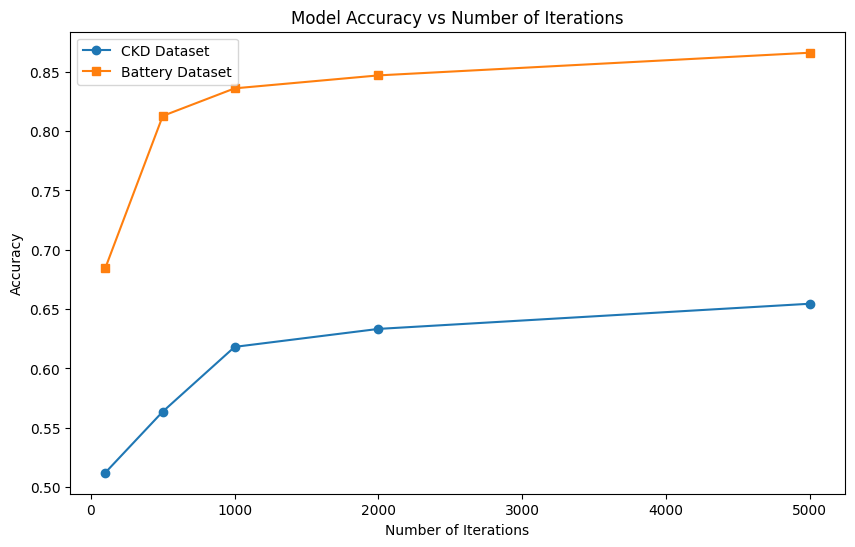

time: 13.6 s (started: 2025-02-16 04:27:41 +00:00)


In [32]:
# graphs accuracy over range of epochs
iterations = [100, 500, 1000, 2000, 5000]
ckd_accuracies = []
battery_accuracies = []

for num_epochs in iterations:
    model = LogisticRegression(learning_rate=0.1, num_epochs=num_epochs)

    ckd_accuracy = k_fold_validation(model, ckd_X, ckd_y)
    battery_accuracy = k_fold_validation(model, battery_X, battery_y)

    ckd_accuracies.append(ckd_accuracy)
    battery_accuracies.append(battery_accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(iterations, ckd_accuracies, marker='o', label="CKD Dataset")
plt.plot(iterations, battery_accuracies, marker='s', label="Battery Dataset")

plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs Number of Iterations")
plt.legend()
plt.grid(False)
plt.show()

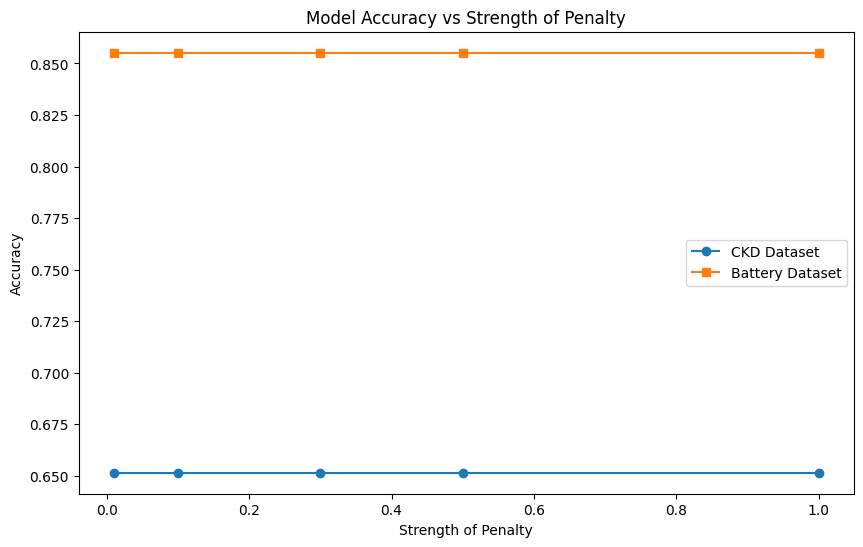

time: 7.38 s (started: 2025-02-16 04:27:55 +00:00)


In [33]:
# graphs accuracy over range of penalties
iterations = [0.01, 0.1, 0.3, 0.5, 1]
ckd_accuracies = []
battery_accuracies = []

for num_penalties in iterations:
    model = LogisticRegression(penalty=num_penalties, learning_rate=0.3, num_epochs=1000)

    ckd_accuracy = k_fold_validation(model, ckd_X, ckd_y)
    battery_accuracy = k_fold_validation(model, battery_X, battery_y)

    ckd_accuracies.append(ckd_accuracy)
    battery_accuracies.append(battery_accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(iterations, ckd_accuracies, marker='o', label="CKD Dataset")
plt.plot(iterations, battery_accuracies, marker='s', label="Battery Dataset")

plt.xlabel("Strength of Penalty")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs Strength of Penalty")
plt.legend()
plt.grid(False)
plt.show()

# Improving Model Accuracy for Standarized Data

In [34]:
ckd_X_df = pd.DataFrame(ckd_X, columns=[f'feature_{i}' for i in range(ckd_X.shape[1])])
ckd_y_df = pd.DataFrame(ckd_y, columns=['target'])
df = pd.concat([ckd_X_df, ckd_y_df], axis=1)

corr_matrix = df.corr().abs()
threshold = 0.6 # or above, doesn't change accuracy value
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# features to drop
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
ckd_df_drop = df.drop(columns=to_drop)

train_ckd_x = ckd_df_drop.iloc[:, :-1].to_numpy()
train_ckd_y = ckd_df_drop.iloc[:, -1].to_numpy()

# train and validate model
model = LogisticRegression("default", learning_rate=0.3, num_epochs=1000)
accuracy = k_fold_validation(model, train_ckd_x, train_ckd_y)

print("CKD accuracy after removing subset of features:", accuracy)


bat_X_df = pd.DataFrame(battery_X, columns=[f'feature_{i}' for i in range(battery_X.shape[1])])
bat_y_df = pd.DataFrame(battery_y, columns=['target'])
df = pd.concat([bat_X_df, bat_y_df], axis=1)

corr_matrix = df.corr().abs()
threshold = 0.7 # or above
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# features to drop
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
bat_df_drop = df.drop(columns=to_drop)

train_bat_x = bat_df_drop.iloc[:, :-1].to_numpy()
train_bat_y = bat_df_drop.iloc[:, -1].to_numpy()

# train and validate model
model = LogisticRegression("default", learning_rate=0.3, num_epochs=1000)
accuracy = k_fold_validation(model, train_bat_x, train_bat_y)

print("Battery accuracy after removing subset of features:", accuracy)

# doesn't improve accuracy so in the report mention some correlated features still contribute different important information

CKD accuracy after removing subset of features: 0.6515151515151516
Battery accuracy after removing subset of features: 0.8551832654572381
time: 2.28 s (started: 2025-02-16 04:28:02 +00:00)


In [35]:
print("Squaring features: ")
for x in range(3):
  index = x + 1
  train_ckd_x = np.hstack((ckd_X, ckd_X[:, index:index+1] ** 2))
  train_bat_x = np.hstack((battery_X, battery_X[:, index:index+1] ** 2))

  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  accuracy1 = k_fold_validation(model, train_ckd_x, ckd_y)
  accuracy2 = k_fold_validation(model, train_bat_x, battery_y)
  print(index, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

print("Cubing features: ")
for x in range(3):
  index = x + 1
  train_ckd_x = np.hstack((ckd_X, ckd_X[:, index:index+1] ** 3))
  train_bat_x = np.hstack((battery_X, battery_X[:, index:index+1] ** 3))

  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  accuracy1 = k_fold_validation(model, train_ckd_x, ckd_y)
  accuracy2 = k_fold_validation(model, train_bat_x, battery_y)
  print(index, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

epsilon = 1e-5 # add to functions to avoid zeroes

print("Log of features: ")
for x in range(3):
  index = x + 1
  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  train_log = np.log(ckd_X[:, index:index+1])
  train_ckd_x = np.hstack((ckd_X, train_log))
  accuracy1 = k_fold_validation(model, train_ckd_x, ckd_y)

  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  train_log = np.log(battery_X[:, index:index+1] + epsilon)
  train_bat_x = np.hstack((battery_X, train_log))
  accuracy2 = k_fold_validation(model, train_bat_x, battery_y)

  print(index, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

print("Square root of features: ")
for x in range(3):
  index = x + 1
  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  train_sqrt = np.sqrt(ckd_X[:, index:index+1])
  train_ckd_x = np.hstack((ckd_X, train_sqrt))
  accuracy1 = k_fold_validation(model, train_ckd_x, ckd_y)

  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  train_sqrt = np.sqrt(battery_X[:, index:index+1] + epsilon)
  train_bat_x = np.hstack((battery_X, train_sqrt))
  accuracy2 = k_fold_validation(model, train_bat_x, battery_y)

  print(index, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

print("Reciprocal of features: ")
for x in range(3):
  index = x + 1
  train_ckd_x = np.hstack((ckd_X, 1 / (ckd_X[:, index:index+1] + epsilon)))
  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  accuracy1 = k_fold_validation(model, train_ckd_x, ckd_y)

  train_bat_x = np.hstack((battery_X, 1 / (battery_X[:, index:index+1] + epsilon)))
  accuracy2 = k_fold_validation(model, train_bat_x, battery_y)

  print(index, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

print("Multiplication of pairs of features: ")
for x in range(3):
  index = x + 1
  train_ckd_x = np.hstack((ckd_X, ckd_X[:, index:index+1] * ckd_X[:, index+1:index+2]))
  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  accuracy1 = k_fold_validation(model, train_ckd_x, ckd_y)

  train_bat_x = np.hstack((battery_X, battery_X[:, index:index+1] * battery_X[:, index+1:index+2]))
  accuracy2 = k_fold_validation(model, train_bat_x, battery_y)

  print(index, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

print("Sin of features: ")
for x in range(3):
  index = x + 1
  train_ckd_x = np.hstack((ckd_X, np.sin(ckd_X[:, index:index+1])))
  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  accuracy1 = k_fold_validation(model, train_ckd_x, ckd_y)

  train_bat_x = np.hstack((battery_X, np.sin(battery_X[:, index:index+1])))
  accuracy2 = k_fold_validation(model, train_bat_x, battery_y)

  print(index, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

Squaring features: 
1 CKD: 0.6545 Battery: 0.8565
2 CKD: 0.6485 Battery: 0.8552
3 CKD: 0.6545 Battery: 0.8552
Cubing features: 
1 CKD: 0.6485 Battery: 0.8511
2 CKD: 0.6424 Battery: 0.8566
3 CKD: 0.6455 Battery: 0.8538
Log of features: 
1 CKD: 0.6515 Battery: 0.8592
2 CKD: 0.6485 Battery: 0.8593
3 CKD: 0.6545 Battery: 0.8620
Square root of features: 
1 CKD: 0.6606 Battery: 0.8443
2 CKD: 0.6515 Battery: 0.8524
3 CKD: 0.6485 Battery: 0.8538
Reciprocal of features: 
1 CKD: 0.6455 Battery: 0.8660
2 CKD: 0.6394 Battery: 0.7320
3 CKD: 0.5848 Battery: 0.6833
Multiplication of pairs of features: 
1 CKD: 0.6424 Battery: 0.8593
2 CKD: 0.6424 Battery: 0.8579
3 CKD: 0.6394 Battery: 0.8552
Sin of features: 
1 CKD: 0.6515 Battery: 0.8511
2 CKD: 0.6515 Battery: 0.8552
3 CKD: 0.6485 Battery: 0.8552
time: 33.5 s (started: 2025-02-16 04:28:05 +00:00)


1 CKD: 0.6515 Battery: 0.8592
2 CKD: 0.6485 Battery: 0.8593
3 CKD: 0.6545 Battery: 0.8620
4 CKD: 0.6455 Battery: 0.8552
5 CKD: 0.6515 Battery: 0.8525
6 CKD: 0.6394 Battery: 0.8538
7 CKD: 0.6333 Battery: 0.8552
8 CKD: 0.6364 Battery: 0.8606
9 CKD: 0.6515 Battery: 0.8607
10 CKD: 0.6485 Battery: 0.8565
11 CKD: 0.6485 Battery: 0.8566
12 CKD: 0.6394 Battery: 0.8483
13 CKD: 0.6606 Battery: 0.8566
14 CKD: 0.6485 Battery: 0.8579
15 CKD: 0.6455 Battery: 0.8606
16 CKD: 0.6455 Battery: 0.8648
17 CKD: 0.6697 Battery: 0.8565
18 CKD: 0.6394 Battery: 0.8579
19 CKD: 0.6515 Battery: 0.8525


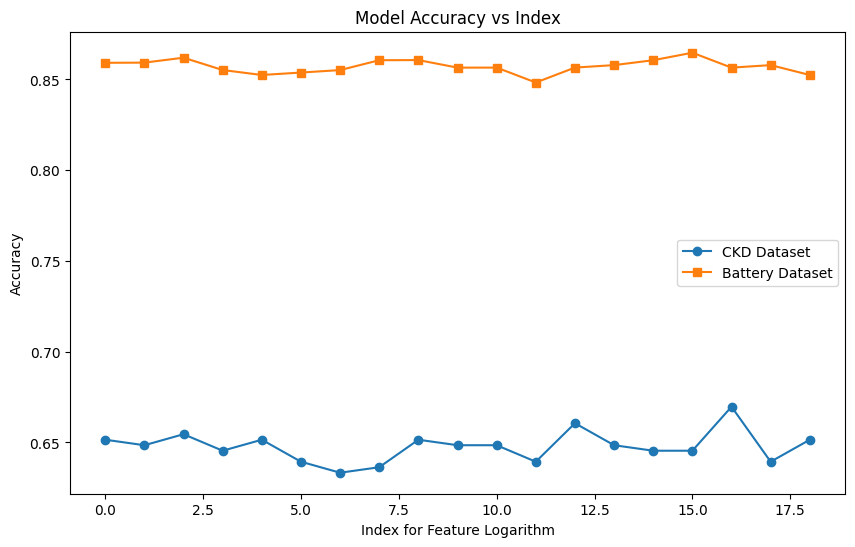

time: 31.8 s (started: 2025-02-16 04:28:38 +00:00)


In [36]:
# graphing logarithm accuracies
ckd_accuracies = []
battery_accuracies = []

epsilon = 1e-5

for x in range(28):
  index = x + 1

  if (ckd_X[:, index:index+1] + epsilon < 0).any():
    break
  if (battery_X[:, index:index+1] + epsilon < 0).any():
    break

  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  train_log = np.log(ckd_X[:, index:index+1] + epsilon)
  train_ckd_x = np.hstack((ckd_X, train_log))
  accuracy1 = k_fold_validation(model, train_ckd_x, ckd_y)

  model = LogisticRegression("default",learning_rate=0.3, num_epochs=1000)
  train_log = np.log(battery_X[:, index:index+1] + epsilon)
  train_bat_x = np.hstack((battery_X, train_log))
  accuracy2 = k_fold_validation(model, train_bat_x, battery_y)

  ckd_accuracies.append(accuracy1)
  battery_accuracies.append(accuracy2)

  print(index, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(ckd_accuracies, marker='o', label="CKD Dataset")
plt.plot(battery_accuracies, marker='s', label="Battery Dataset")

plt.xlabel("Index for Feature Logarithm")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs Index")
plt.legend()
plt.grid(False)
plt.show()

In [37]:
# also the different models given the same learning rate and epoch
default_model = LogisticRegression("default", learning_rate=0.3, num_epochs=1000)
l1_model = LogisticRegression("l1", learning_rate=0.3, num_epochs=1000)
l2_model = LogisticRegression("l2", learning_rate=0.3, num_epochs=1000)
models = [default_model, l1_model, l2_model]

for model in models:
  accuracy1 = k_fold_validation(model, ckd_X, ckd_y)
  accuracy2 = k_fold_validation(model, battery_X, battery_y)
  print(model.regularization, f'CKD: {accuracy1:.4f}', f'Battery: {accuracy2:.4f}')

default CKD: 0.6515 Battery: 0.8552
l1 CKD: 0.4424 Battery: 0.5191
l2 CKD: 0.4939 Battery: 0.6777
time: 4.77 s (started: 2025-02-16 04:29:10 +00:00)


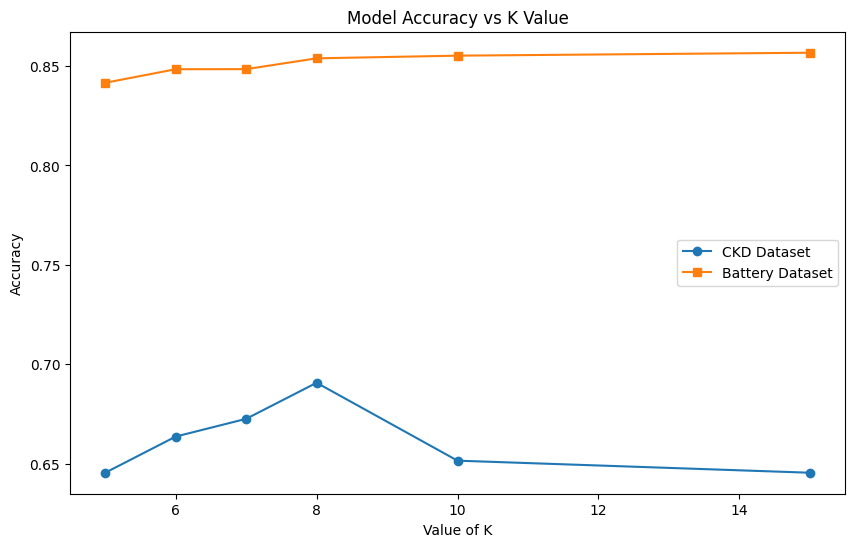

time: 9.17 s (started: 2025-02-16 04:29:15 +00:00)


In [38]:
# graphs accuracy over range of k's
iterations = [5, 6, 7, 8, 10, 15]
ckd_accuracies = []
battery_accuracies = []

for test_k in iterations:
    model = LogisticRegression(learning_rate=0.3, num_epochs=1000)

    ckd_accuracy = k_fold_validation(model, ckd_X, ckd_y, k = test_k)
    battery_accuracy = k_fold_validation(model, battery_X, battery_y, k = test_k)

    ckd_accuracies.append(ckd_accuracy)
    battery_accuracies.append(battery_accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(iterations, ckd_accuracies, marker='o', label="CKD Dataset")
plt.plot(iterations, battery_accuracies, marker='s', label="Battery Dataset")

plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs K Value")
plt.legend()
plt.grid(False)
plt.show()